<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="10%" />
</center>

<center> <h2> NET 4103/7431 Complex Network </h2> </center>

<center> <h3> Vincent Gauthier (vincent.gauthier@telecom-sudparis.eu) </h3> </center>

<center> <h4> Submitted by : Arjun Saseendran </h4> </center>

In [2]:
NOM = "Saseendran"
PRENOM = "Arjun"

<h1>2.	Social Network Analysis with Facebook100 Dataset</h1>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

caltech = nx.read_gml('data/Caltech36.gml')
mit = nx.read_gml('data/MIT8.gml')
jhu = nx.read_gml('data/Johns Hopkins55.gml')

caltech_lcc = caltech.subgraph(max(nx.connected_components(caltech), key=len)).copy()
mit_lcc = mit.subgraph(max(nx.connected_components(mit), key=len)).copy()
jhu_lcc = jhu.subgraph(max(nx.connected_components(jhu), key=len)).copy()

print(f"Caltech LCC: {len(caltech_lcc)} nodes")
print(f"MIT LCC: {len(mit_lcc)} nodes")
print(f"JHU LCC: {len(jhu_lcc)} nodes")

Caltech LCC: 762 nodes
MIT LCC: 6402 nodes
JHU LCC: 5157 nodes


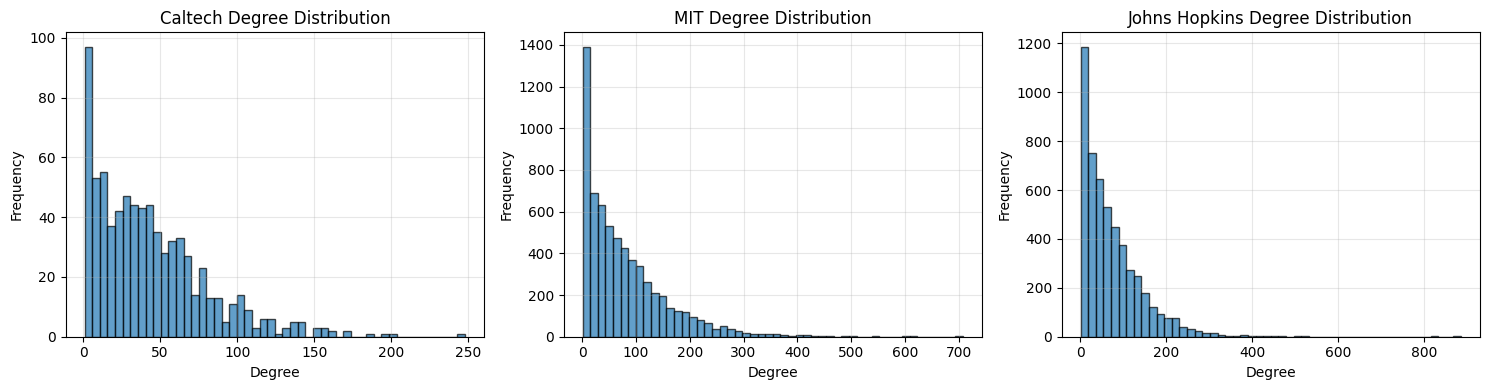

In [2]:
def get_degree_distribution(G):
    degrees = [d for n, d in G.degree()]
    return degrees

# Plotting all three
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, G, name in zip(axes, [caltech_lcc, mit_lcc, jhu_lcc], 
                        ['Caltech', 'MIT', 'Johns Hopkins']):
    degrees = get_degree_distribution(G)
    ax.hist(degrees, bins=50, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name} Degree Distribution')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
def analyze_network(G, name):
    # Global clustering coefficient
    global_cc = nx.transitivity(G)
    
    # Mean local clustering coefficient
    local_cc = nx.average_clustering(G)
    
    # Edge density
    density = nx.density(G)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    
    print(f"\n{name} Network Statistics:")
    print(f"  Nodes: {n_nodes}")
    print(f"  Edges: {n_edges}")
    print(f"  Global Clustering Coefficient: {global_cc:.4f}")
    print(f"  Mean Local Clustering Coefficient: {local_cc:.4f}")
    print(f"  Edge Density: {density:.6f}")
    
    # Sparsity check
    if density < 0.01:
        print(f"  → {name} is SPARSE (density < 1%)")
    else:
        print(f"  → {name} has moderate density")
    
    return {
        'name': name,
        'nodes': n_nodes,
        'edges': n_edges,
        'global_cc': global_cc,
        'local_cc': local_cc,
        'density': density
    }

# Analyzing all three
results = []
for G, name in zip([caltech_lcc, mit_lcc, jhu_lcc], 
                   ['Caltech', 'MIT', 'Johns Hopkins']):
    results.append(analyze_network(G, name))

# summary table
df_results = pd.DataFrame(results)
print("\n" + "="*60)
print(df_results.to_string(index=False))


Caltech Network Statistics:
  Nodes: 762
  Edges: 16651
  Global Clustering Coefficient: 0.2913
  Mean Local Clustering Coefficient: 0.4091
  Edge Density: 0.057429
  → Caltech has moderate density

MIT Network Statistics:
  Nodes: 6402
  Edges: 251230
  Global Clustering Coefficient: 0.1803
  Mean Local Clustering Coefficient: 0.2724
  Edge Density: 0.012261
  → MIT has moderate density

Johns Hopkins Network Statistics:
  Nodes: 5157
  Edges: 186572
  Global Clustering Coefficient: 0.1932
  Mean Local Clustering Coefficient: 0.2690
  Edge Density: 0.014034
  → Johns Hopkins has moderate density

         name  nodes  edges  global_cc  local_cc  density
      Caltech    762  16651   0.291281  0.409117 0.057429
          MIT   6402 251230   0.180288  0.272360 0.012261
Johns Hopkins   5157 186572   0.193161  0.269008 0.014034


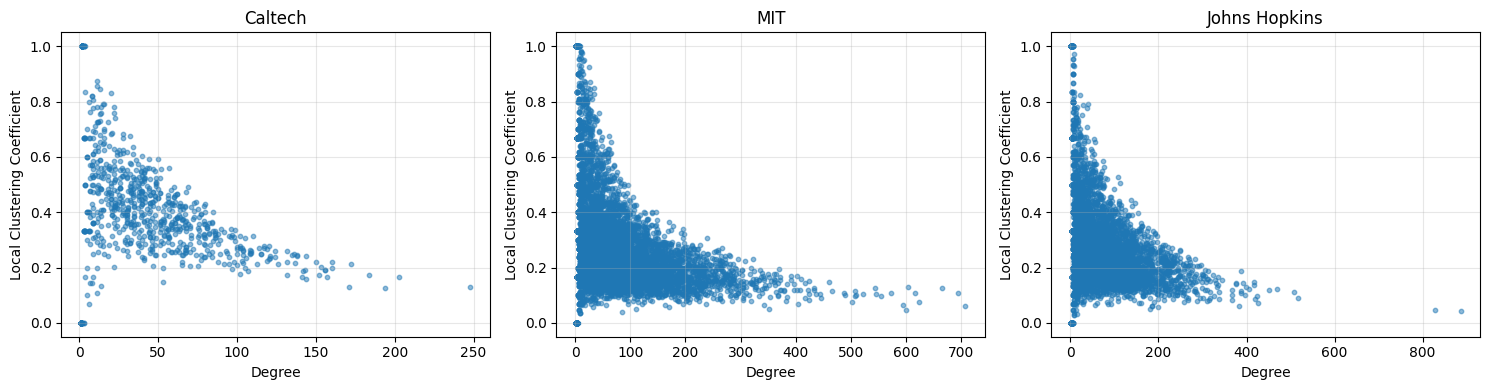

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, G, name in zip(axes, [caltech_lcc, mit_lcc, jhu_lcc], 
                        ['Caltech', 'MIT', 'Johns Hopkins']):
    # Getting each node's degree and local clustering 
    degrees = dict(G.degree())
    clustering = nx.clustering(G)
    
    # Create lists for plotting
    x = [degrees[node] for node in G.nodes()]
    y = [clustering[node] for node in G.nodes()]
    
    ax.scatter(x, y, alpha=0.5, s=10)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Local Clustering Coefficient')
    ax.set_title(f'{name}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h1>3: Assortativity Analysis with the Facebook100 Dataset</h1>

Loading all Facebook100 networks...
Found 100 network files

Successfully loaded 100 networks

Computing assortativity for all networks...
Trying multiple attribute name variants for robustness...

  American75: status='student_fac' -> r=0.2878
  American75: major='major_index' -> r=0.0458
  American75: dorm='dorm' -> r=0.2191
  American75: gender='gender' -> r=0.0255
  Amherst41: status='student_fac' -> r=0.4034
  Amherst41: major='major_index' -> r=0.0420
  Amherst41: dorm='dorm' -> r=0.0748
  Amherst41: gender='gender' -> r=0.0473
  Auburn71: status='student_fac' -> r=0.1919
  Auburn71: major='major_index' -> r=0.0397
  Auburn71: dorm='dorm' -> r=0.2404
  Auburn71: gender='gender' -> r=0.0786
  Baylor93: status='student_fac' -> r=0.3001
  Baylor93: major='major_index' -> r=0.0442
  Baylor93: dorm='dorm' -> r=0.2315
  Baylor93: gender='gender' -> r=0.0797
  BC17: status='student_fac' -> r=0.5332
  BC17: major='major_index' -> r=0.0401
  BC17: dorm='dorm' -> r=0.1206
  BC17: gender='g

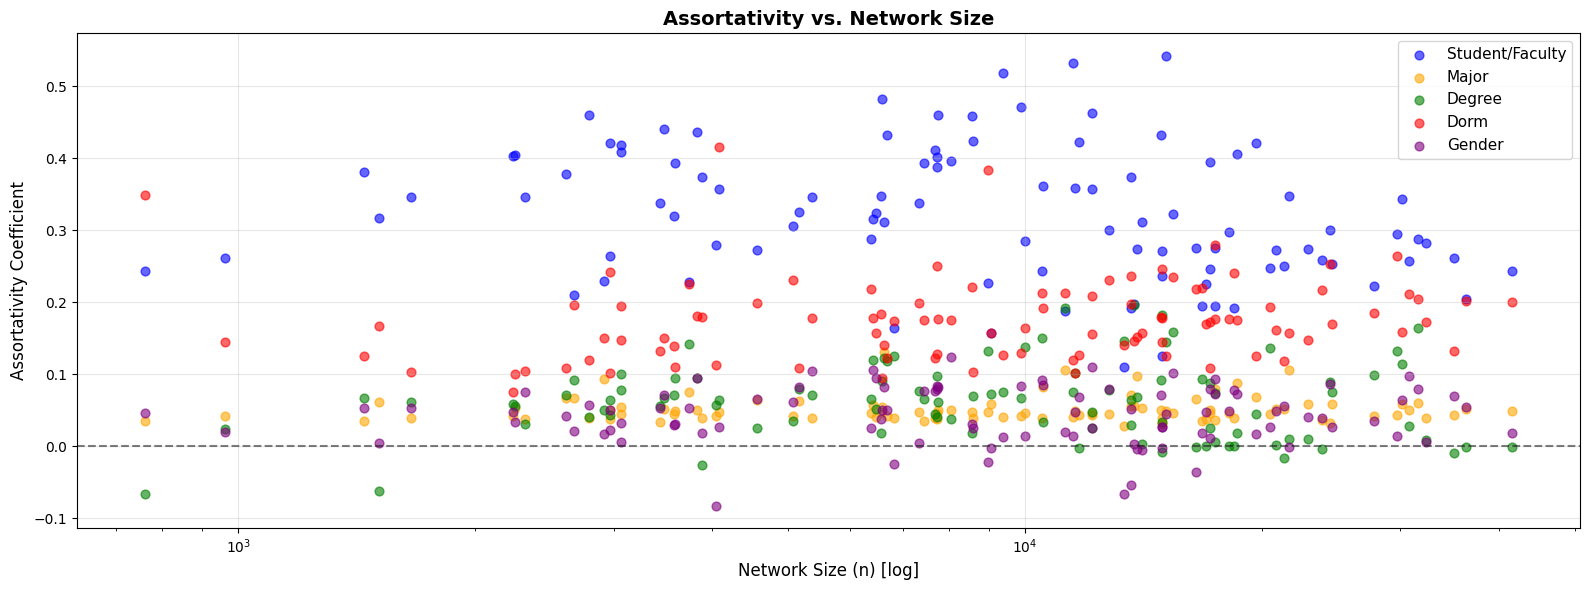

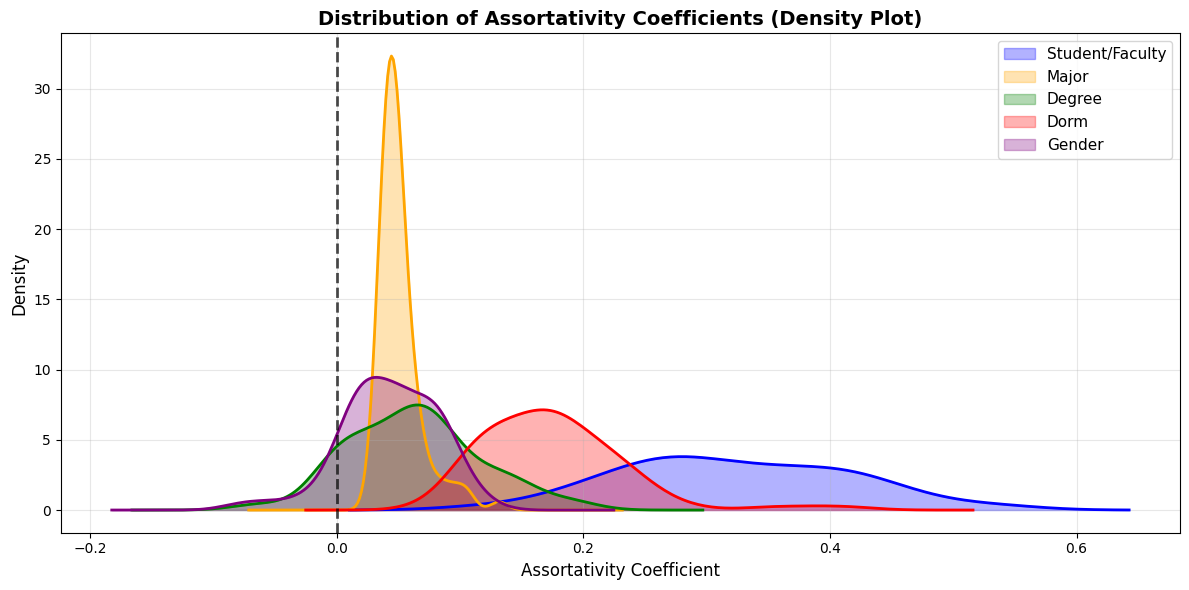


Creating individual attribute plots...


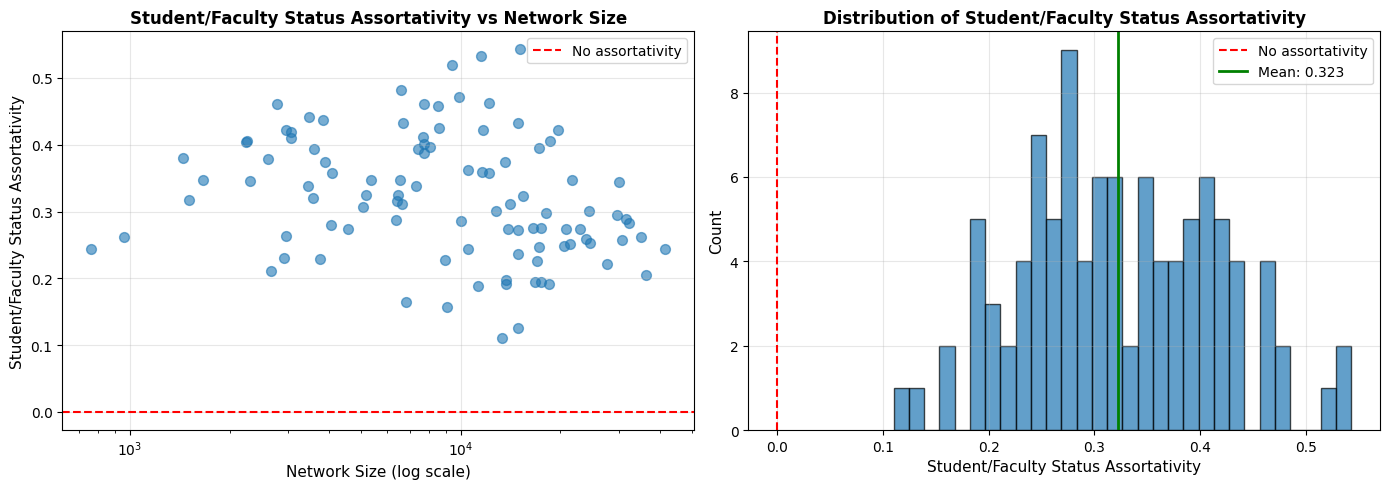


STUDENT/FACULTY STATUS ASSORTATIVITY SUMMARY
Networks analyzed: 100
Mean: 0.3227
Median: 0.3165
Std Dev: 0.0925
Min: 0.1102
Max: 0.5426



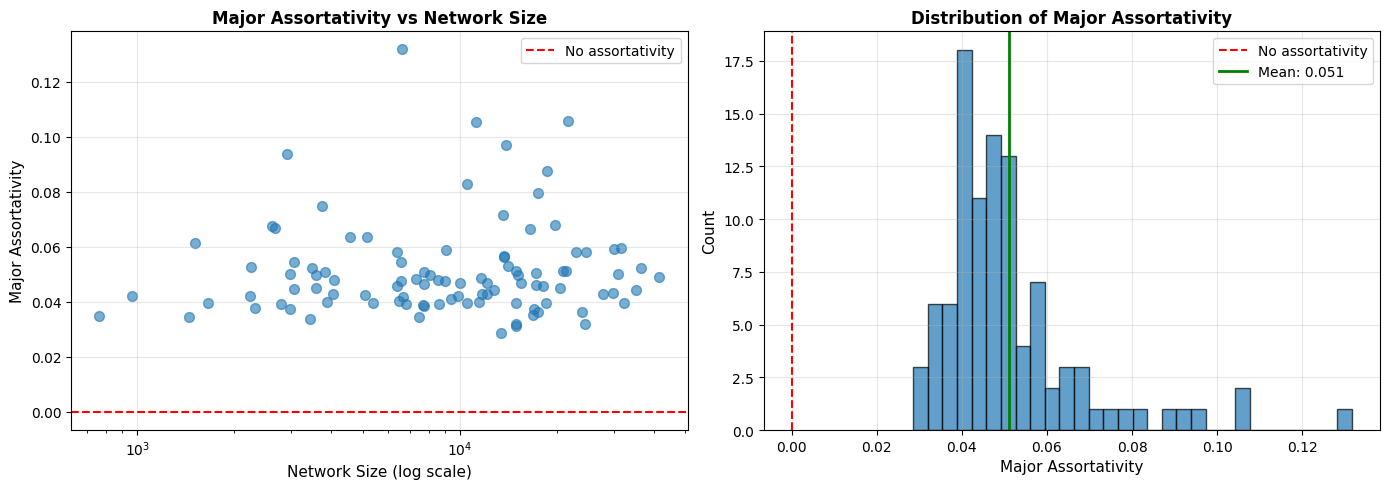


MAJOR ASSORTATIVITY SUMMARY
Networks analyzed: 100
Mean: 0.0511
Median: 0.0468
Std Dev: 0.0173
Min: 0.0286
Max: 0.1316



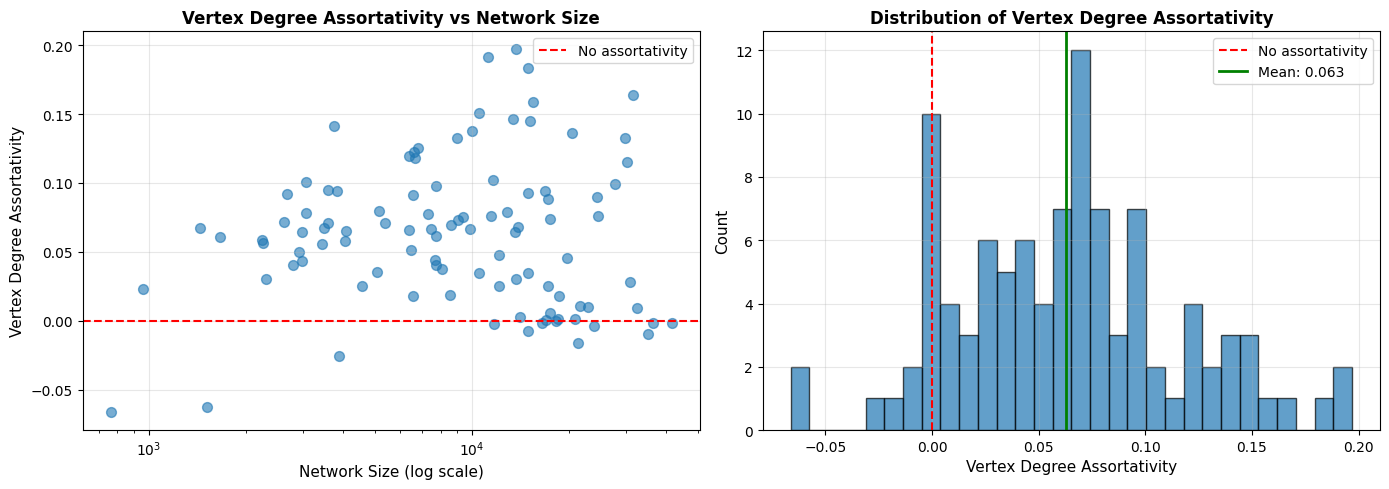


VERTEX DEGREE ASSORTATIVITY SUMMARY
Networks analyzed: 100
Mean: 0.0626
Median: 0.0647
Std Dev: 0.0529
Min: -0.0662
Max: 0.1969



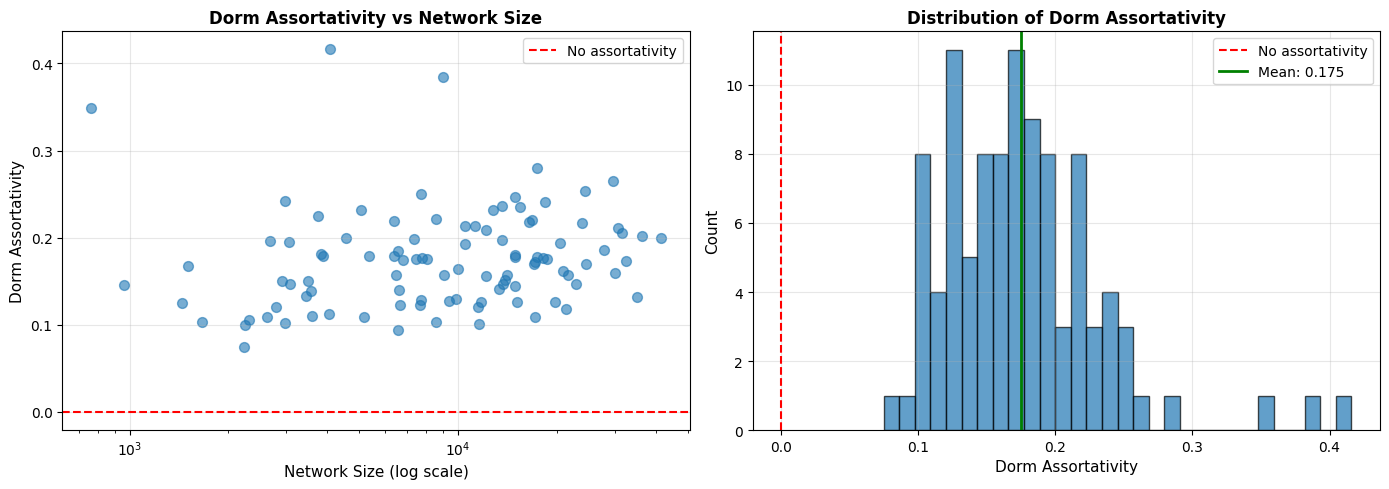


DORM ASSORTATIVITY SUMMARY
Networks analyzed: 100
Mean: 0.1751
Median: 0.1727
Std Dev: 0.0577
Min: 0.0748
Max: 0.4160



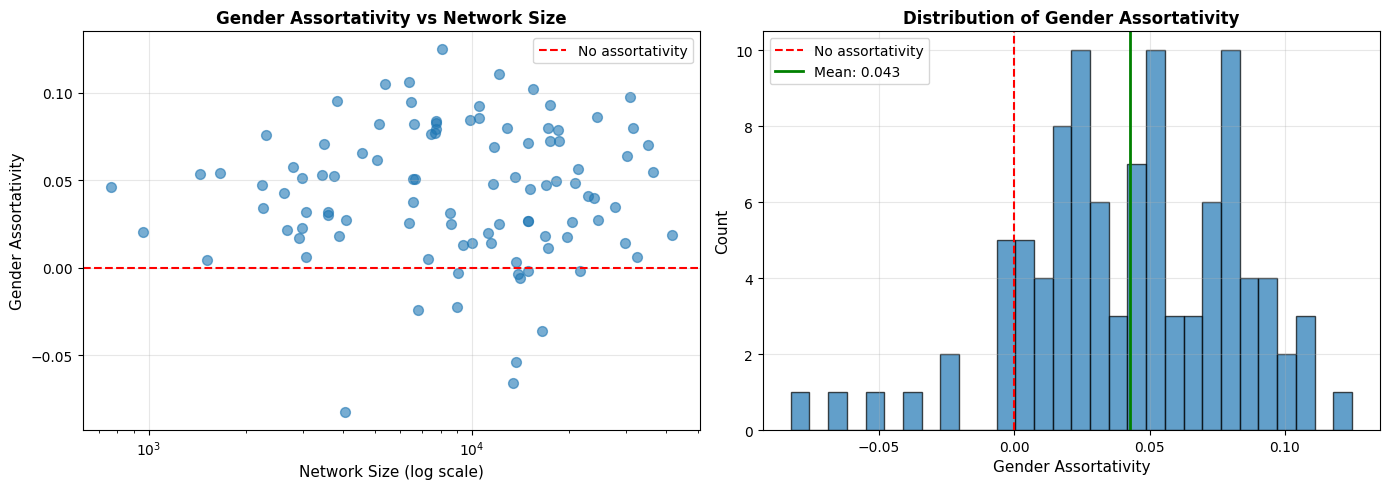


GENDER ASSORTATIVITY SUMMARY
Networks analyzed: 100
Mean: 0.0429
Median: 0.0467
Std Dev: 0.0386
Min: -0.0825
Max: 0.1247


SUMMARY TABLE: Assortativity Statistics Across All Attributes
      Attribute  N Networks     Mean   Median  Std Dev       Min      Max
Student/Faculty         100 0.322694 0.316504 0.092522  0.110210 0.542615
          Major         100 0.051107 0.046795 0.017260  0.028563 0.131643
  Vertex Degree         100 0.062609 0.064682 0.052865 -0.066171 0.196876
           Dorm         100 0.175098 0.172655 0.057732  0.074814 0.416011
         Gender         100 0.042949 0.046691 0.038573 -0.082493 0.124720

✅ All plots generated successfully!


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = Path('./data') 

# ============================================================================
# LOAD NETWORKS
# ============================================================================

def load_all_networks(data_path):
    """Load all .gml files from the data directory"""
    gml_files = list(data_path.glob('*.gml'))
    print(f"Found {len(gml_files)} network files")
    
    networks = []
    for gml_file in sorted(gml_files):
        try:
            G = nx.read_gml(gml_file)
            # Extract LCC
            lcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
            networks.append({
                'name': gml_file.stem,
                'graph': lcc,
                'size': len(lcc)
            })
        except Exception as e:
            print(f"Error loading {gml_file.name}: {e}")
    
    return networks

# ============================================================================
# ATTRIBUTE EXTRACTION - FIXED VERSION
# ============================================================================

def get_attribute_values(G, attribute):
    """
    Extract attribute values from graph - LESS STRICT FILTERING
    
    Key fix: Don't filter out 0 (it's a valid value for status!)
    """
    attribute_dict = {}
    
    for node in G.nodes():
        if attribute in G.nodes[node]:
            value = G.nodes[node][attribute]
            if value is not None and value != '':
                attribute_dict[node] = value
    
    return attribute_dict


def try_multiple_attribute_names(G, possible_names):
    """
    Try multiple possible attribute names
    Returns (attribute_name, data_dict) or (None, {})
    """
    for attr_name in possible_names:
        data = get_attribute_values(G, attr_name)
        if len(data) > 0:
            return attr_name, data
    
    return None, {}

# ============================================================================
# ASSORTATIVITY COMPUTATION
# ============================================================================

def compute_attribute_assortativity(G, attribute):
    """
    Compute assortativity for a categorical attribute
    Returns None if attribute doesn't exist or has insufficient data
    """
    try:
        # Get attribute values with less strict filtering
        values = get_attribute_values(G, attribute)
        
        if len(values) < 10: 
            return None
        
        # Create subgraph with nodes that have this attribute
        valid_nodes = list(values.keys())
        G_sub = G.subgraph(valid_nodes).copy()
        
        # Check if subgraph has edges
        if G_sub.number_of_edges() == 0:
            return None
        
        # Compute assortativity
        assortativity = nx.attribute_assortativity_coefficient(G_sub, attribute)
        return assortativity
    
    except Exception as e:
        return None


def compute_degree_assortativity(G):
    """Compute degree assortativity (numeric)"""
    try:
        return nx.degree_assortativity_coefficient(G)
    except:
        return None

# ============================================================================
# MAIN ANALYSIS
# ============================================================================

def analyze_assortativity_all_networks(networks):
    """Analyze assortativity for all networks and ALL 5 attributes"""
    
    # Attribute name variations to try
    attribute_variants = {
        'status': ['status', 'student_fac', 'student_faculty', 'student/faculty'],
        'major': ['major', 'major_index'],
        'dorm': ['dorm', 'dormitory', 'residence'],
        'gender': ['gender', 'sex'],
    }
    
    results = []
    
    print("Computing assortativity for all networks...")
    print("Trying multiple attribute name variants for robustness...\n")
    
    for net_info in networks:
        G = net_info['graph']
        name = net_info['name']
        size = net_info['size']
        
        result = {
            'name': name,
            'size': size
        }
        
        # Try each attribute with multiple possible names
        for attr_key, possible_names in attribute_variants.items():
            found_name, values = try_multiple_attribute_names(G, possible_names)
            
            if found_name:
                assortativity = compute_attribute_assortativity(G, found_name)
                result[attr_key] = assortativity
                if assortativity is not None:
                    print(f"  {name}: {attr_key}='{found_name}' -> r={assortativity:.4f}")
            else:
                result[attr_key] = None
        
        # Degree assortativity (always computable)
        result['degree'] = compute_degree_assortativity(G)
        
        results.append(result)
    
    return pd.DataFrame(results)

# ============================================================================
# VISUALIZATION
# ============================================================================

def plot_all_attributes_combined(df):
    """
    Create Hung-style plot: all attributes on one scatter plot
    """
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    
    attributes = {
        'status': ('Student/Faculty', 'blue'),
        'major': ('Major', 'orange'),
        'degree': ('Degree', 'green'),
        'dorm': ('Dorm', 'red'),
        'gender': ('Gender', 'purple')
    }
    
    for i, (attr_key, (attr_name, color)) in enumerate(attributes.items()):
        df_valid = df[df[attr_key].notna()].copy()
        
        if len(df_valid) > 0:
            ax.scatter(df_valid['size'], df_valid[attr_key], 
                      alpha=0.6, s=40, color=color, label=attr_name)
    
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    ax.set_xscale('log')
    ax.set_xlabel('Network Size (n) [log]', fontsize=12)
    ax.set_ylabel('Assortativity Coefficient', fontsize=12)
    ax.set_title('Assortativity vs. Network Size', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('assortativity_all_combined.png', dpi=300, bbox_inches='tight')
    plt.show()


def plot_density_overlay(df):
    """
    Create Hung-style overlaid density plot
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    attributes = {
        'status': ('Student/Faculty', 'blue'),
        'major': ('Major', 'orange'),
        'degree': ('Degree', 'green'),
        'dorm': ('Dorm', 'red'),
        'gender': ('Gender', 'purple')
    }
    
    for attr_key, (attr_name, color) in attributes.items():
        df_valid = df[df[attr_key].notna()].copy()
        
        if len(df_valid) > 5:  
            data = df_valid[attr_key].values
            
            # Create density plot
            from scipy import stats
            density = stats.gaussian_kde(data)
            x_range = np.linspace(data.min() - 0.1, data.max() + 0.1, 200)
            y = density(x_range)
            
            ax.fill_between(x_range, y, alpha=0.3, color=color, label=attr_name)
            ax.plot(x_range, y, color=color, linewidth=2)
    
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.7)
    ax.set_xlabel('Assortativity Coefficient', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_title('Distribution of Assortativity Coefficients (Density Plot)', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('assortativity_density_overlay.png', dpi=300, bbox_inches='tight')
    plt.show()


def plot_individual_attributes(df):
    """
    Create individual scatter + histogram for each attribute
    (Keep your original detailed plots)
    """
    attributes = {
        'status': 'Student/Faculty Status',
        'major': 'Major',
        'degree': 'Vertex Degree',
        'dorm': 'Dorm',
        'gender': 'Gender'
    }
    
    for attr_key, attr_name in attributes.items():
        df_valid = df[df[attr_key].notna()].copy()
        
        if len(df_valid) == 0:
            print(f"No valid data for {attr_name}")
            continue
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Left: Scatter
        ax1 = axes[0]
        ax1.scatter(df_valid['size'], df_valid[attr_key], alpha=0.6, s=50)
        ax1.axhline(y=0, color='r', linestyle='--', linewidth=1.5, label='No assortativity')
        ax1.set_xscale('log')
        ax1.set_xlabel('Network Size (log scale)', fontsize=11)
        ax1.set_ylabel(f'{attr_name} Assortativity', fontsize=11)
        ax1.set_title(f'{attr_name} Assortativity vs Network Size', fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Right: Histogram
        ax2 = axes[1]
        ax2.hist(df_valid[attr_key], bins=30, edgecolor='black', alpha=0.7)
        ax2.axvline(x=0, color='r', linestyle='--', linewidth=1.5, label='No assortativity')
        ax2.axvline(x=df_valid[attr_key].mean(), color='green', linestyle='-', 
                    linewidth=2, label=f'Mean: {df_valid[attr_key].mean():.3f}')
        ax2.set_xlabel(f'{attr_name} Assortativity', fontsize=11)
        ax2.set_ylabel('Count', fontsize=11)
        ax2.set_title(f'Distribution of {attr_name} Assortativity', fontsize=12, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'assortativity_{attr_key}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print summary
        print(f"\n{'='*60}")
        print(f"{attr_name.upper()} ASSORTATIVITY SUMMARY")
        print(f"{'='*60}")
        print(f"Networks analyzed: {len(df_valid)}")
        print(f"Mean: {df_valid[attr_key].mean():.4f}")
        print(f"Median: {df_valid[attr_key].median():.4f}")
        print(f"Std Dev: {df_valid[attr_key].std():.4f}")
        print(f"Min: {df_valid[attr_key].min():.4f}")
        print(f"Max: {df_valid[attr_key].max():.4f}")
        print(f"{'='*60}\n")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    # Load all networks
    print("Loading all Facebook100 networks...")
    networks = load_all_networks(DATA_PATH)
    print(f"\nSuccessfully loaded {len(networks)} networks\n")
    
    # Compute assortativity
    df_results = analyze_assortativity_all_networks(networks)
    
    # Save results
    df_results.to_csv('assortativity_results.csv', index=False)
    print("\n✅ Results saved to 'assortativity_results.csv'\n")
    
    print("Creating combined plots (Hung-style)...")
    plot_all_attributes_combined(df_results)
    plot_density_overlay(df_results)
    
    # Create individual detailed plots
    print("\nCreating individual attribute plots...")
    plot_individual_attributes(df_results)
    
    # Summary table
    print("\n" + "="*80)
    print("SUMMARY TABLE: Assortativity Statistics Across All Attributes")
    print("="*80)
    
    attributes = {
        'status': 'Student/Faculty',
        'major': 'Major',
        'degree': 'Vertex Degree',
        'dorm': 'Dorm',
        'gender': 'Gender'
    }
    
    summary_data = []
    for attr_key, attr_name in attributes.items():
        df_valid = df_results[df_results[attr_key].notna()]
        if len(df_valid) > 0:
            summary_data.append({
                'Attribute': attr_name,
                'N Networks': len(df_valid),
                'Mean': df_valid[attr_key].mean(),
                'Median': df_valid[attr_key].median(),
                'Std Dev': df_valid[attr_key].std(),
                'Min': df_valid[attr_key].min(),
                'Max': df_valid[attr_key].max()
            })
    
    df_summary = pd.DataFrame(summary_data)
    print(df_summary.to_string(index=False))
    print("="*80)
    
    print("\n✅ All plots generated successfully!")


if __name__ == "__main__":
    main()

<h1>4: Link prediction</h1>


Processing Caltech36 (762 nodes, 16651 edges)

  Testing with 5% edges removed...
    Removed 832 edges
    Running CommonNeighbors... P@100=0.380, R@100=0.046
    Running Jaccard... P@100=0.230, R@100=0.028
    Running Adamic/Adar... P@100=0.380, R@100=0.046

  Testing with 10% edges removed...
    Removed 1665 edges
    Running CommonNeighbors... P@100=0.550, R@100=0.033
    Running Jaccard... P@100=0.360, R@100=0.022
    Running Adamic/Adar... P@100=0.540, R@100=0.032

  Testing with 15% edges removed...
    Removed 2497 edges
    Running CommonNeighbors... P@100=0.600, R@100=0.024
    Running Jaccard... P@100=0.410, R@100=0.016
    Running Adamic/Adar... P@100=0.630, R@100=0.025

  Testing with 20% edges removed...
    Removed 3330 edges
    Running CommonNeighbors... P@100=0.660, R@100=0.020
    Running Jaccard... P@100=0.460, R@100=0.014
    Running Adamic/Adar... P@100=0.620, R@100=0.019


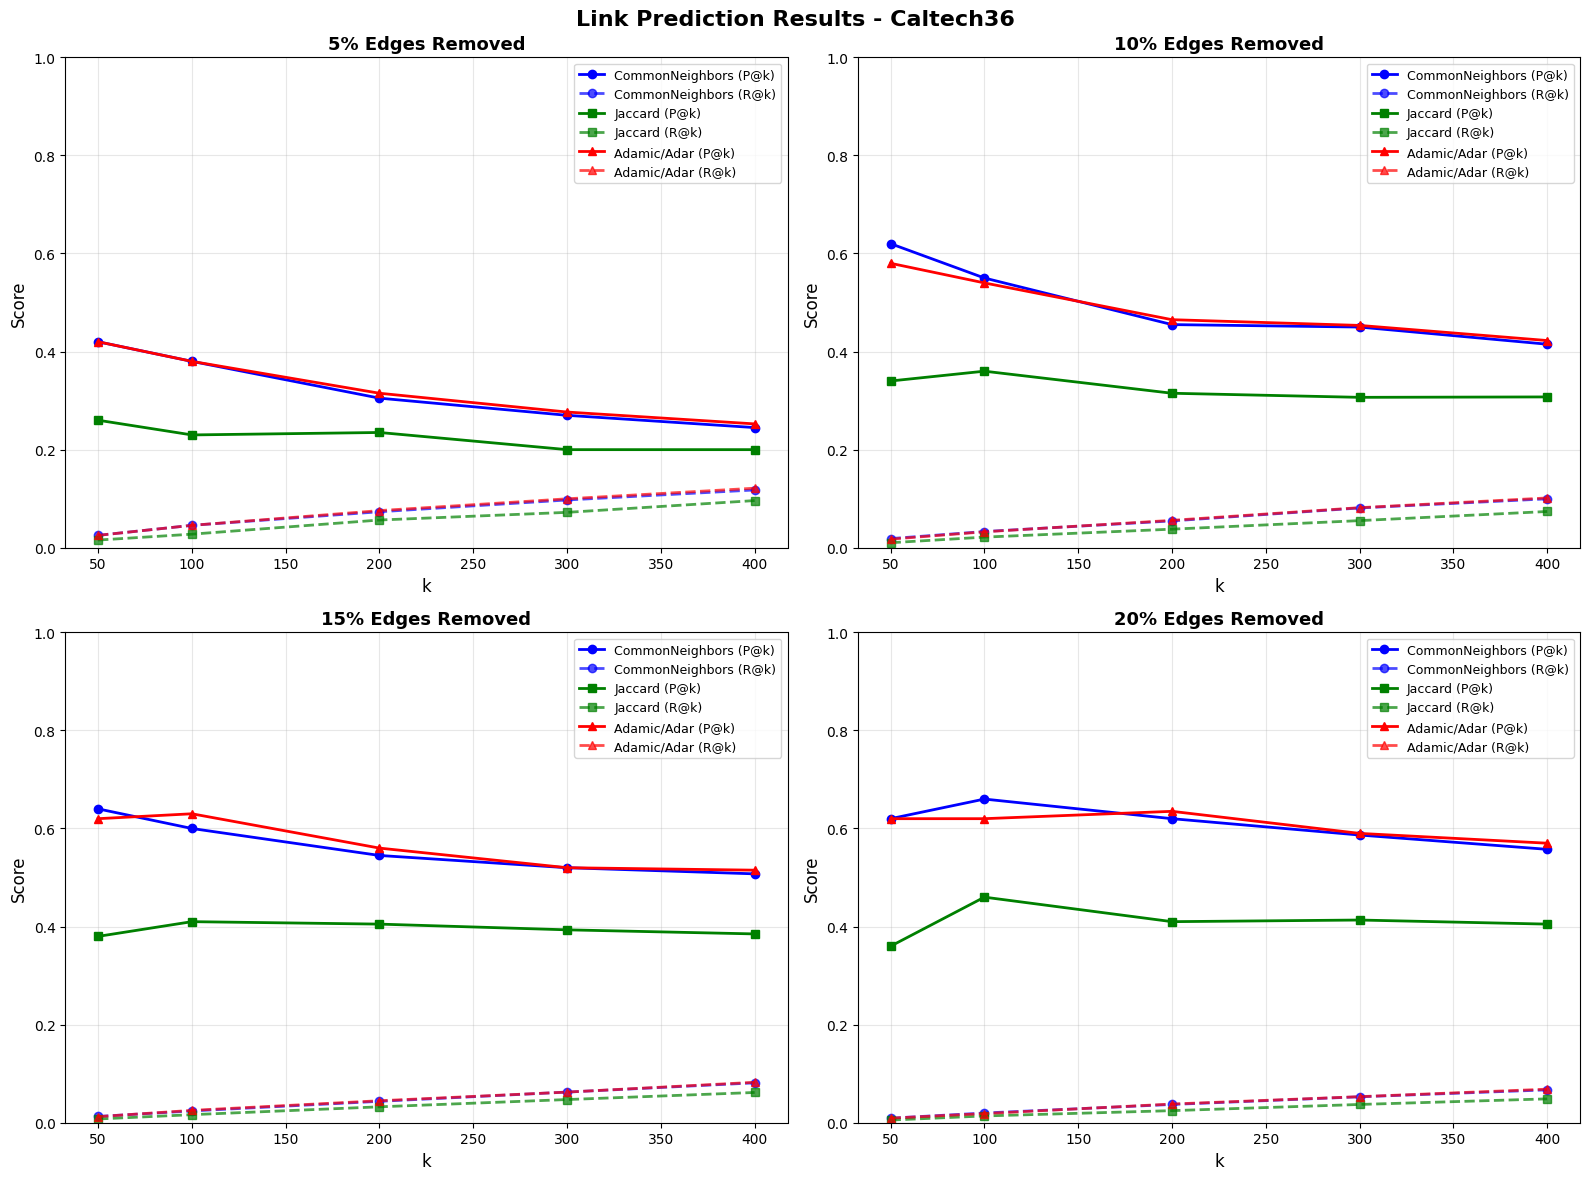


Processing Reed98 (962 nodes, 18812 edges)

  Testing with 5% edges removed...
    Removed 940 edges
    Running CommonNeighbors... P@100=0.220, R@100=0.023
    Running Jaccard... P@100=0.200, R@100=0.021
    Running Adamic/Adar... P@100=0.250, R@100=0.027

  Testing with 10% edges removed...
    Removed 1881 edges
    Running CommonNeighbors... P@100=0.400, R@100=0.021
    Running Jaccard... P@100=0.330, R@100=0.018
    Running Adamic/Adar... P@100=0.400, R@100=0.021

  Testing with 15% edges removed...
    Removed 2821 edges
    Running CommonNeighbors... P@100=0.450, R@100=0.016
    Running Jaccard... P@100=0.400, R@100=0.014
    Running Adamic/Adar... P@100=0.440, R@100=0.016

  Testing with 20% edges removed...
    Removed 3762 edges
    Running CommonNeighbors... P@100=0.490, R@100=0.013
    Running Jaccard... P@100=0.500, R@100=0.013
    Running Adamic/Adar... P@100=0.480, R@100=0.013


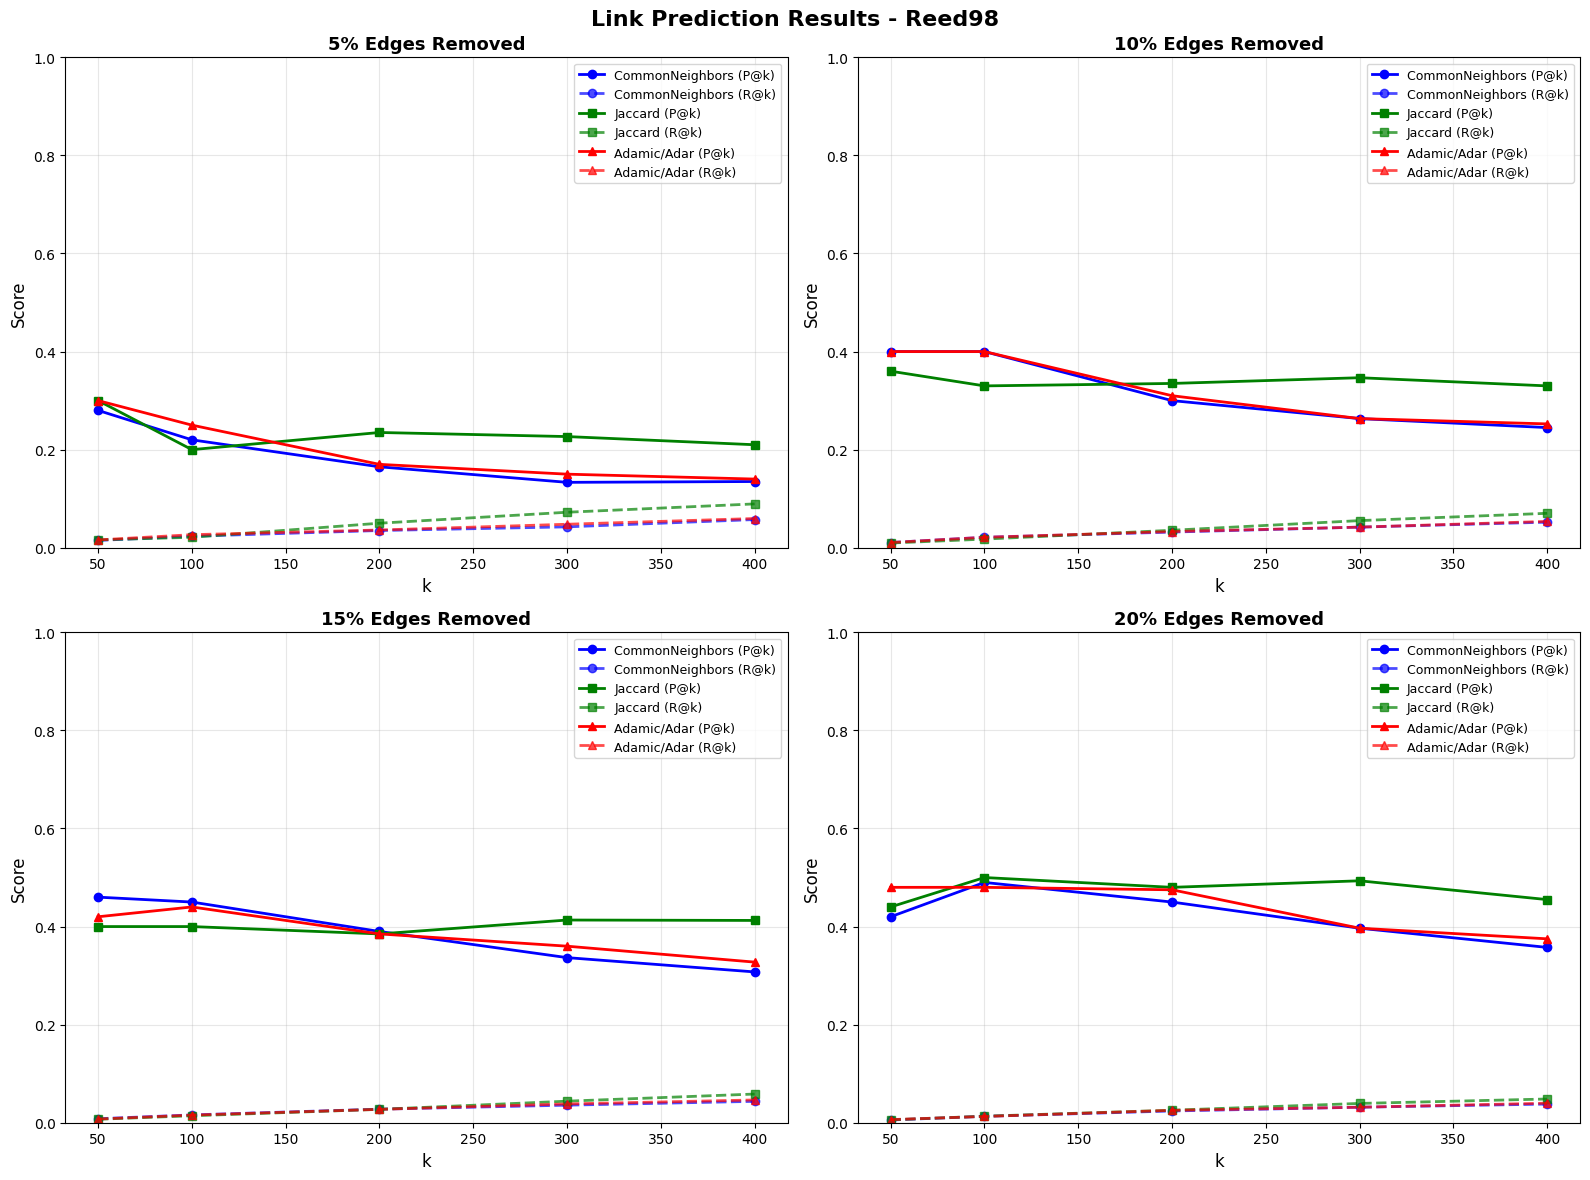


Processing Haverford76 (1446 nodes, 59589 edges)

  Testing with 5% edges removed...
    Removed 2979 edges
    Running CommonNeighbors... P@100=0.250, R@100=0.008
    Running Jaccard... P@100=0.200, R@100=0.007
    Running Adamic/Adar... P@100=0.260, R@100=0.009

  Testing with 10% edges removed...
    Removed 5958 edges
    Running CommonNeighbors... P@100=0.330, R@100=0.006
    Running Jaccard... P@100=0.270, R@100=0.005
    Running Adamic/Adar... P@100=0.340, R@100=0.006

  Testing with 15% edges removed...
    Removed 8938 edges
    Running CommonNeighbors... P@100=0.480, R@100=0.005
    Running Jaccard... P@100=0.330, R@100=0.004
    Running Adamic/Adar... P@100=0.480, R@100=0.005

  Testing with 20% edges removed...
    Removed 11917 edges
    Running CommonNeighbors... P@100=0.490, R@100=0.004
    Running Jaccard... P@100=0.320, R@100=0.003
    Running Adamic/Adar... P@100=0.510, R@100=0.004


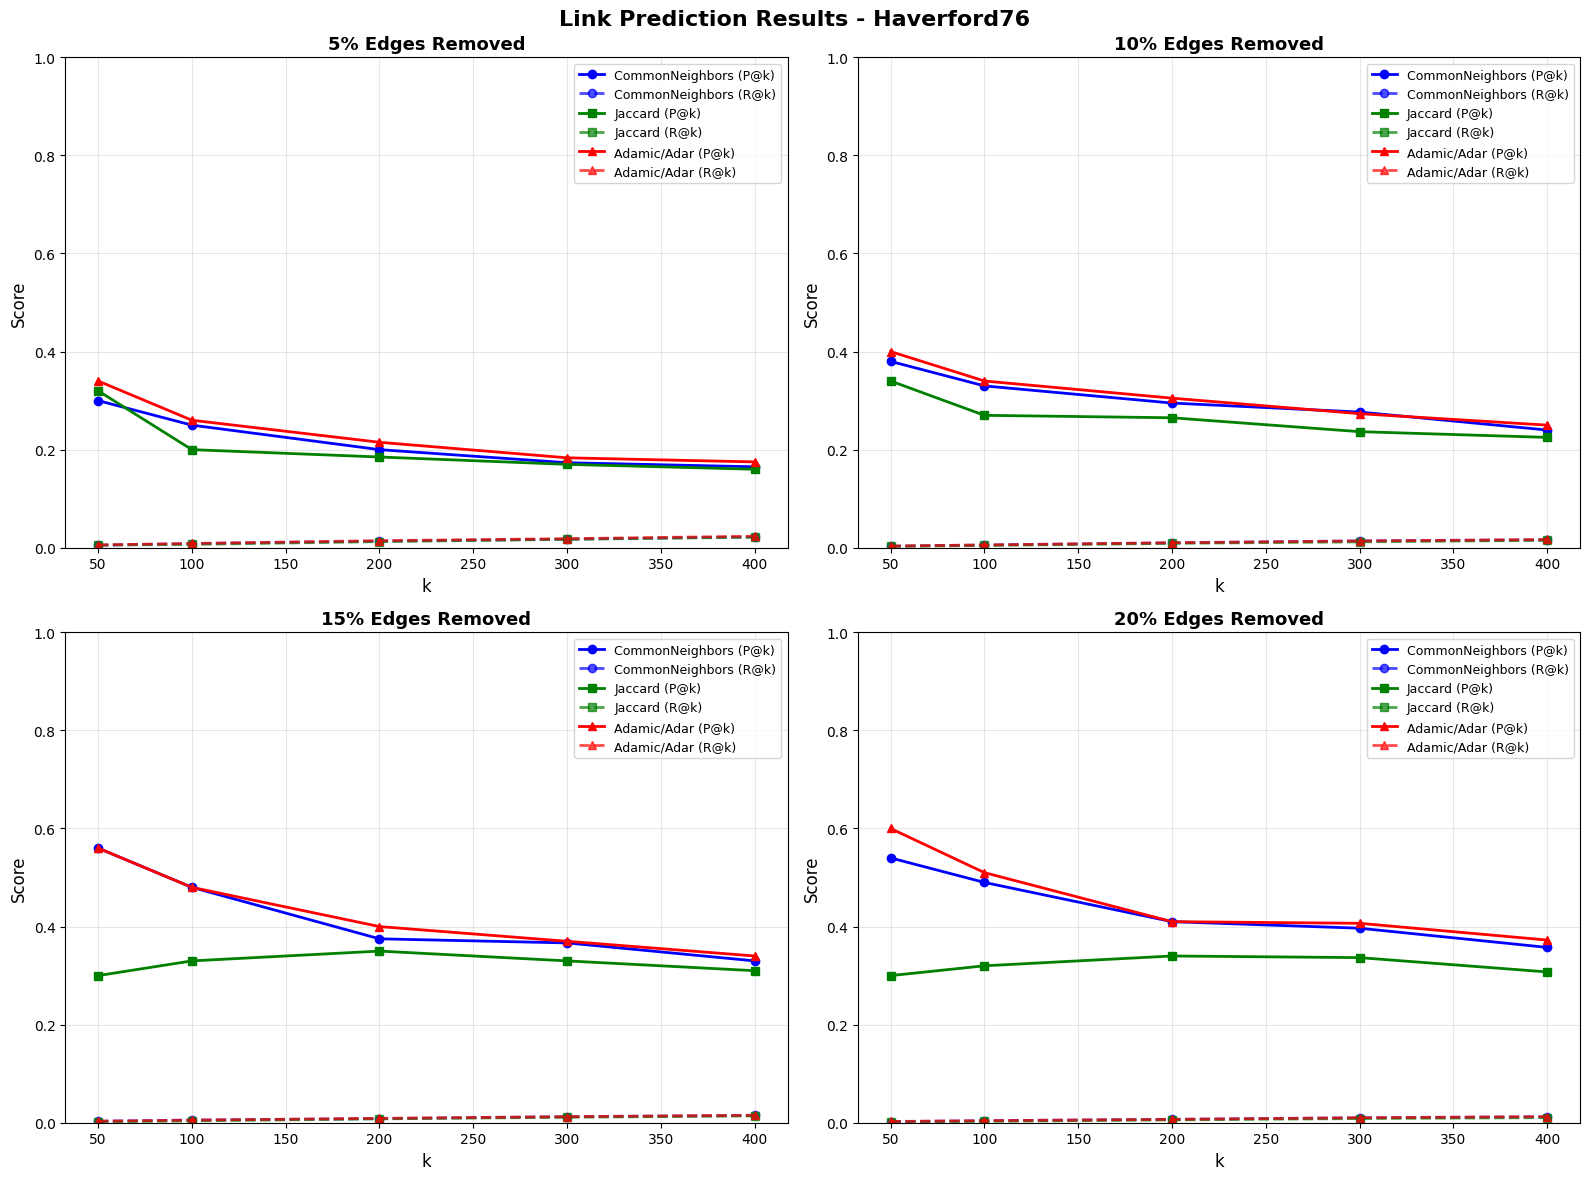


Processing Swarthmore42 (1657 nodes, 61049 edges)

  Testing with 5% edges removed...
    Removed 3052 edges
    Running CommonNeighbors... P@100=0.170, R@100=0.006
    Running Jaccard... P@100=0.260, R@100=0.009
    Running Adamic/Adar... P@100=0.170, R@100=0.006

  Testing with 10% edges removed...
    Removed 6104 edges
    Running CommonNeighbors... P@100=0.330, R@100=0.005
    Running Jaccard... P@100=0.310, R@100=0.005
    Running Adamic/Adar... P@100=0.330, R@100=0.005

  Testing with 15% edges removed...
    Removed 9157 edges
    Running CommonNeighbors... P@100=0.350, R@100=0.004
    Running Jaccard... P@100=0.360, R@100=0.004
    Running Adamic/Adar... P@100=0.350, R@100=0.004

  Testing with 20% edges removed...
    Removed 12209 edges
    Running CommonNeighbors... P@100=0.360, R@100=0.003
    Running Jaccard... P@100=0.360, R@100=0.003
    Running Adamic/Adar... P@100=0.370, R@100=0.003


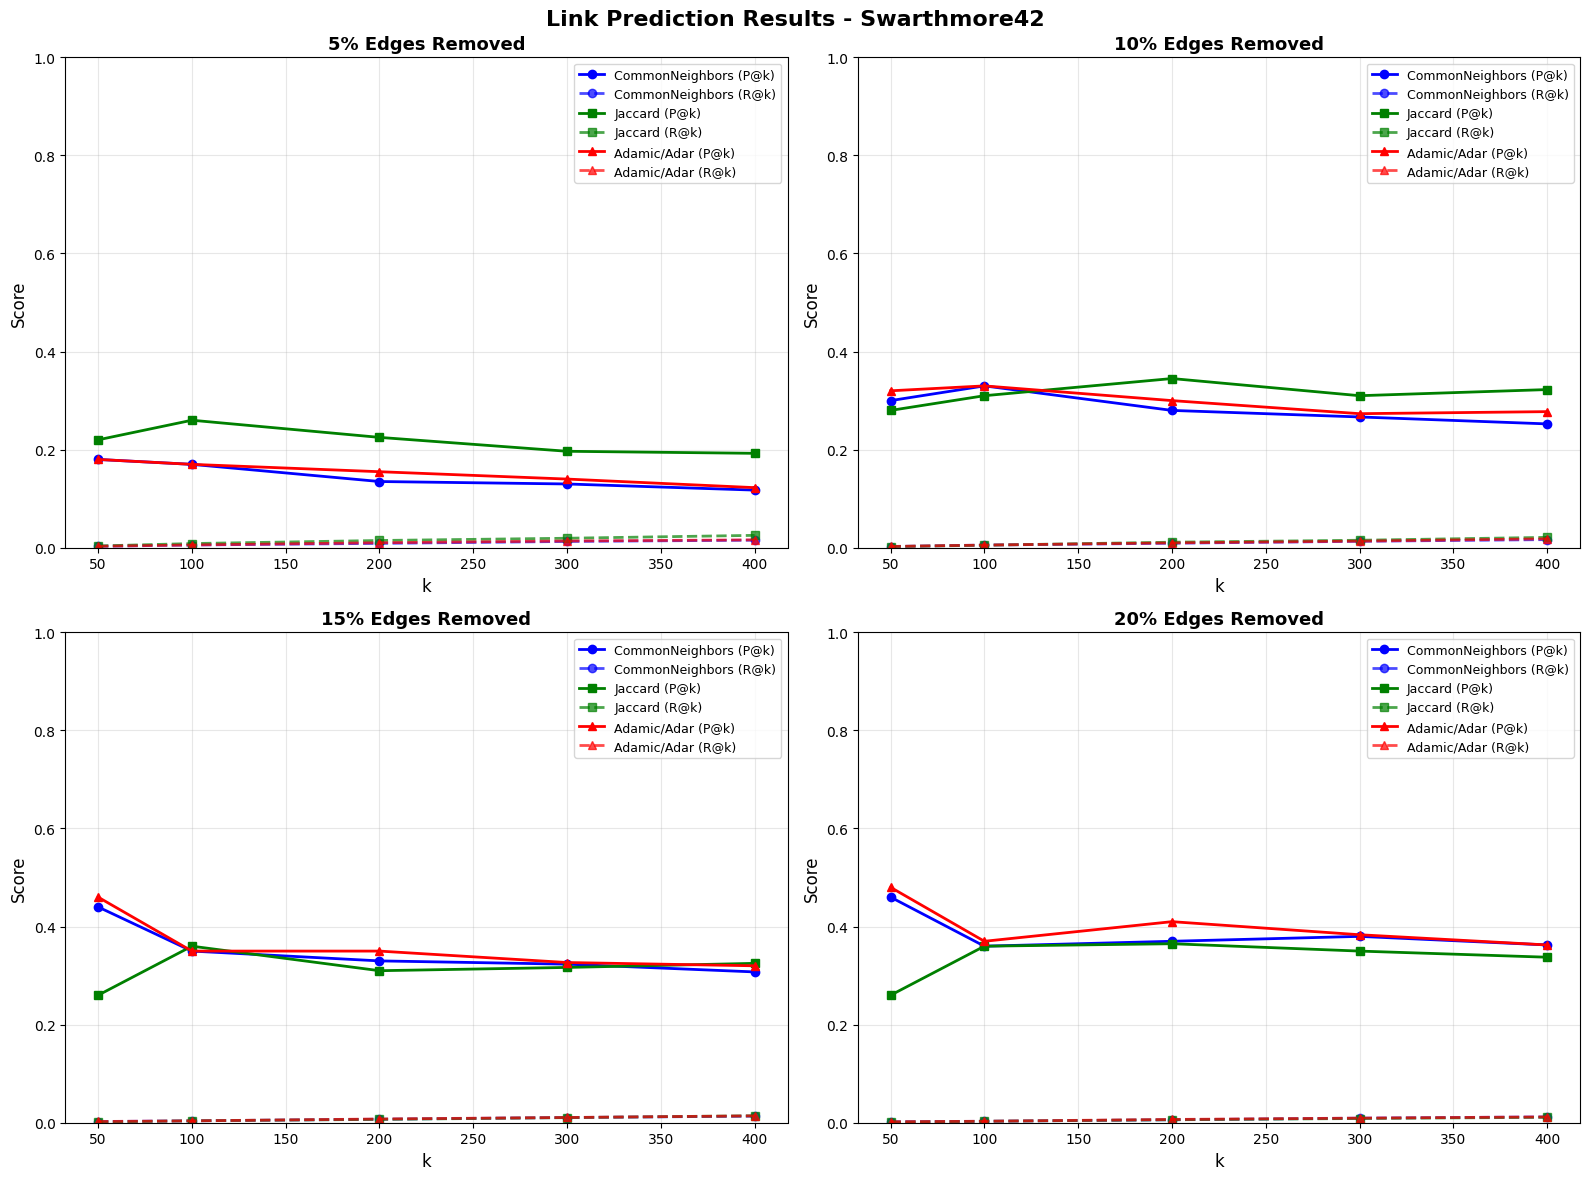


Processing Amherst41 (2235 nodes, 90954 edges)

  Testing with 5% edges removed...
    Removed 4547 edges
    Running CommonNeighbors... P@100=0.170, R@100=0.004
    Running Jaccard... P@100=0.310, R@100=0.007
    Running Adamic/Adar... P@100=0.150, R@100=0.003

  Testing with 10% edges removed...
    Removed 9095 edges
    Running CommonNeighbors... P@100=0.280, R@100=0.003
    Running Jaccard... P@100=0.360, R@100=0.004
    Running Adamic/Adar... P@100=0.260, R@100=0.003

  Testing with 15% edges removed...
    Removed 13643 edges
    Running CommonNeighbors... P@100=0.290, R@100=0.002
    Running Jaccard... P@100=0.360, R@100=0.003
    Running Adamic/Adar... P@100=0.300, R@100=0.002

  Testing with 20% edges removed...
    Removed 18190 edges
    Running CommonNeighbors... P@100=0.360, R@100=0.002
    Running Jaccard... P@100=0.350, R@100=0.002
    Running Adamic/Adar... P@100=0.350, R@100=0.002


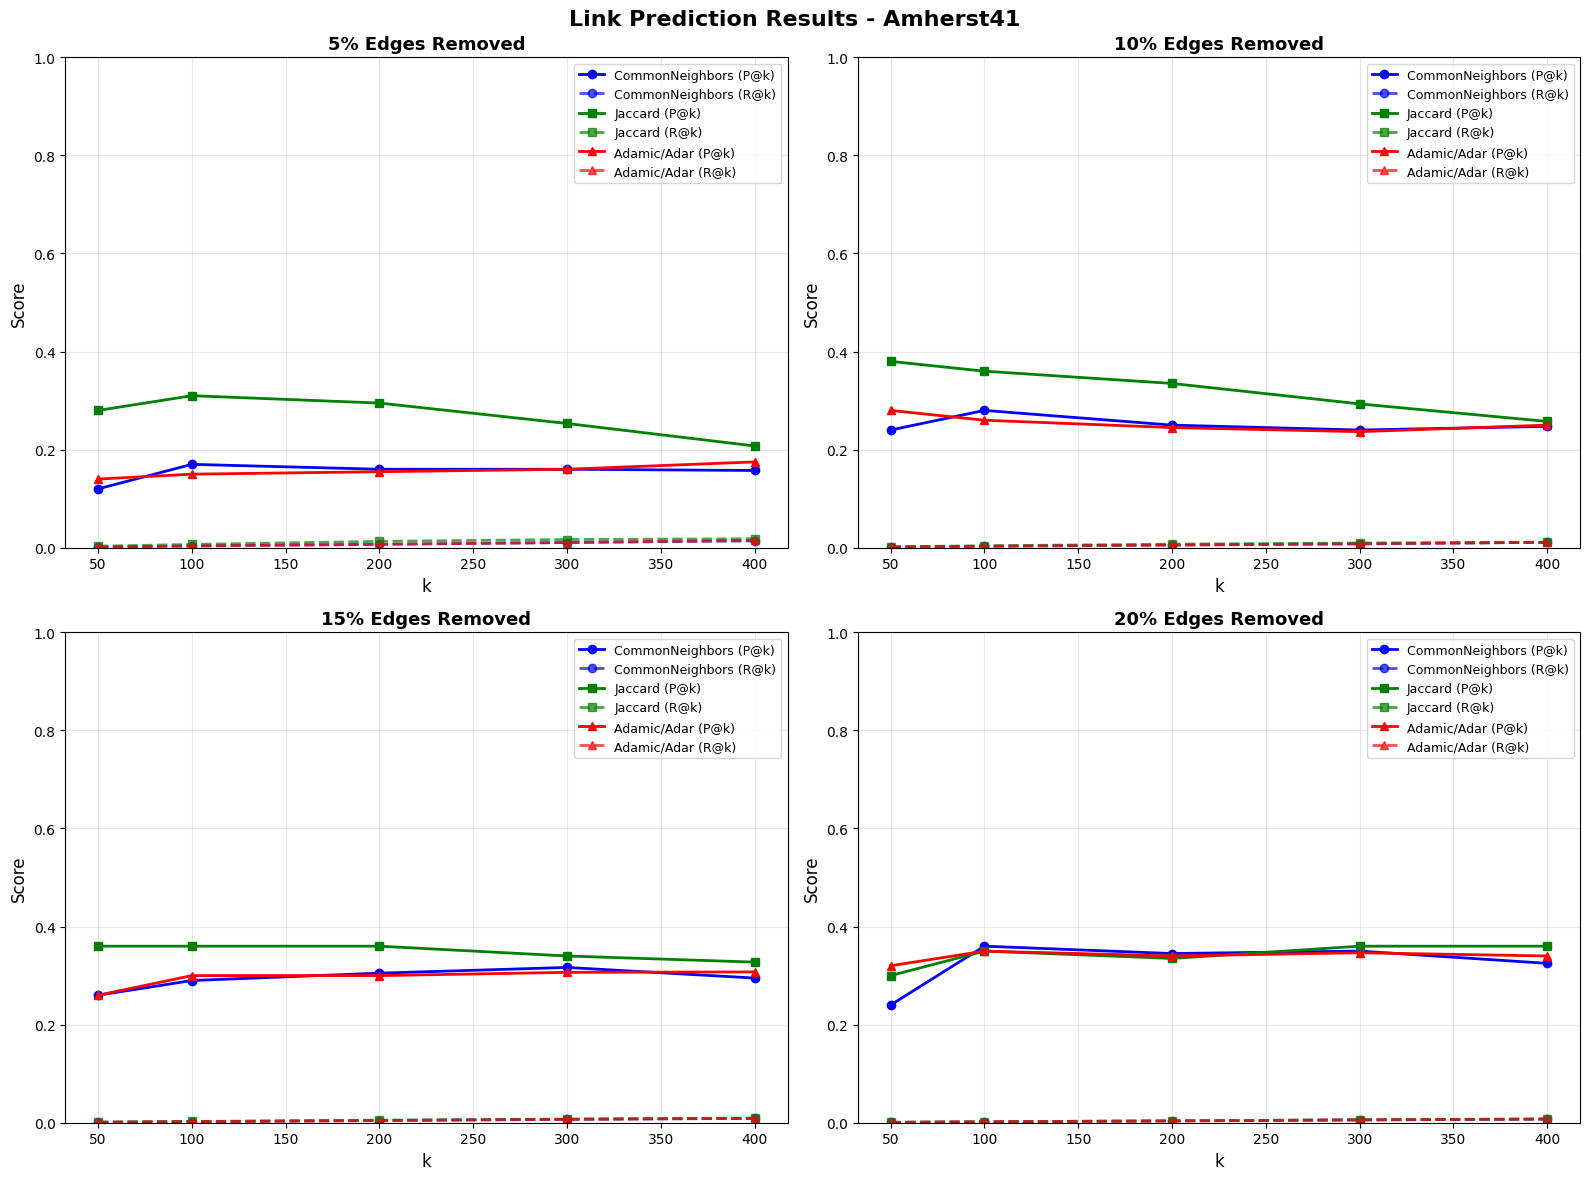


Processing Bowdoin47 (2250 nodes, 84386 edges)

  Testing with 5% edges removed...
    Removed 4219 edges
    Running CommonNeighbors... P@100=0.210, R@100=0.005
    Running Jaccard... P@100=0.200, R@100=0.005
    Running Adamic/Adar... P@100=0.230, R@100=0.005

  Testing with 10% edges removed...
    Removed 8438 edges
    Running CommonNeighbors... P@100=0.300, R@100=0.004
    Running Jaccard... P@100=0.300, R@100=0.004
    Running Adamic/Adar... P@100=0.330, R@100=0.004

  Testing with 15% edges removed...
    Removed 12657 edges
    Running CommonNeighbors... P@100=0.380, R@100=0.003
    Running Jaccard... P@100=0.320, R@100=0.003
    Running Adamic/Adar... P@100=0.400, R@100=0.003

  Testing with 20% edges removed...
    Removed 16877 edges
    Running CommonNeighbors... P@100=0.400, R@100=0.002
    Running Jaccard... P@100=0.350, R@100=0.002
    Running Adamic/Adar... P@100=0.380, R@100=0.002


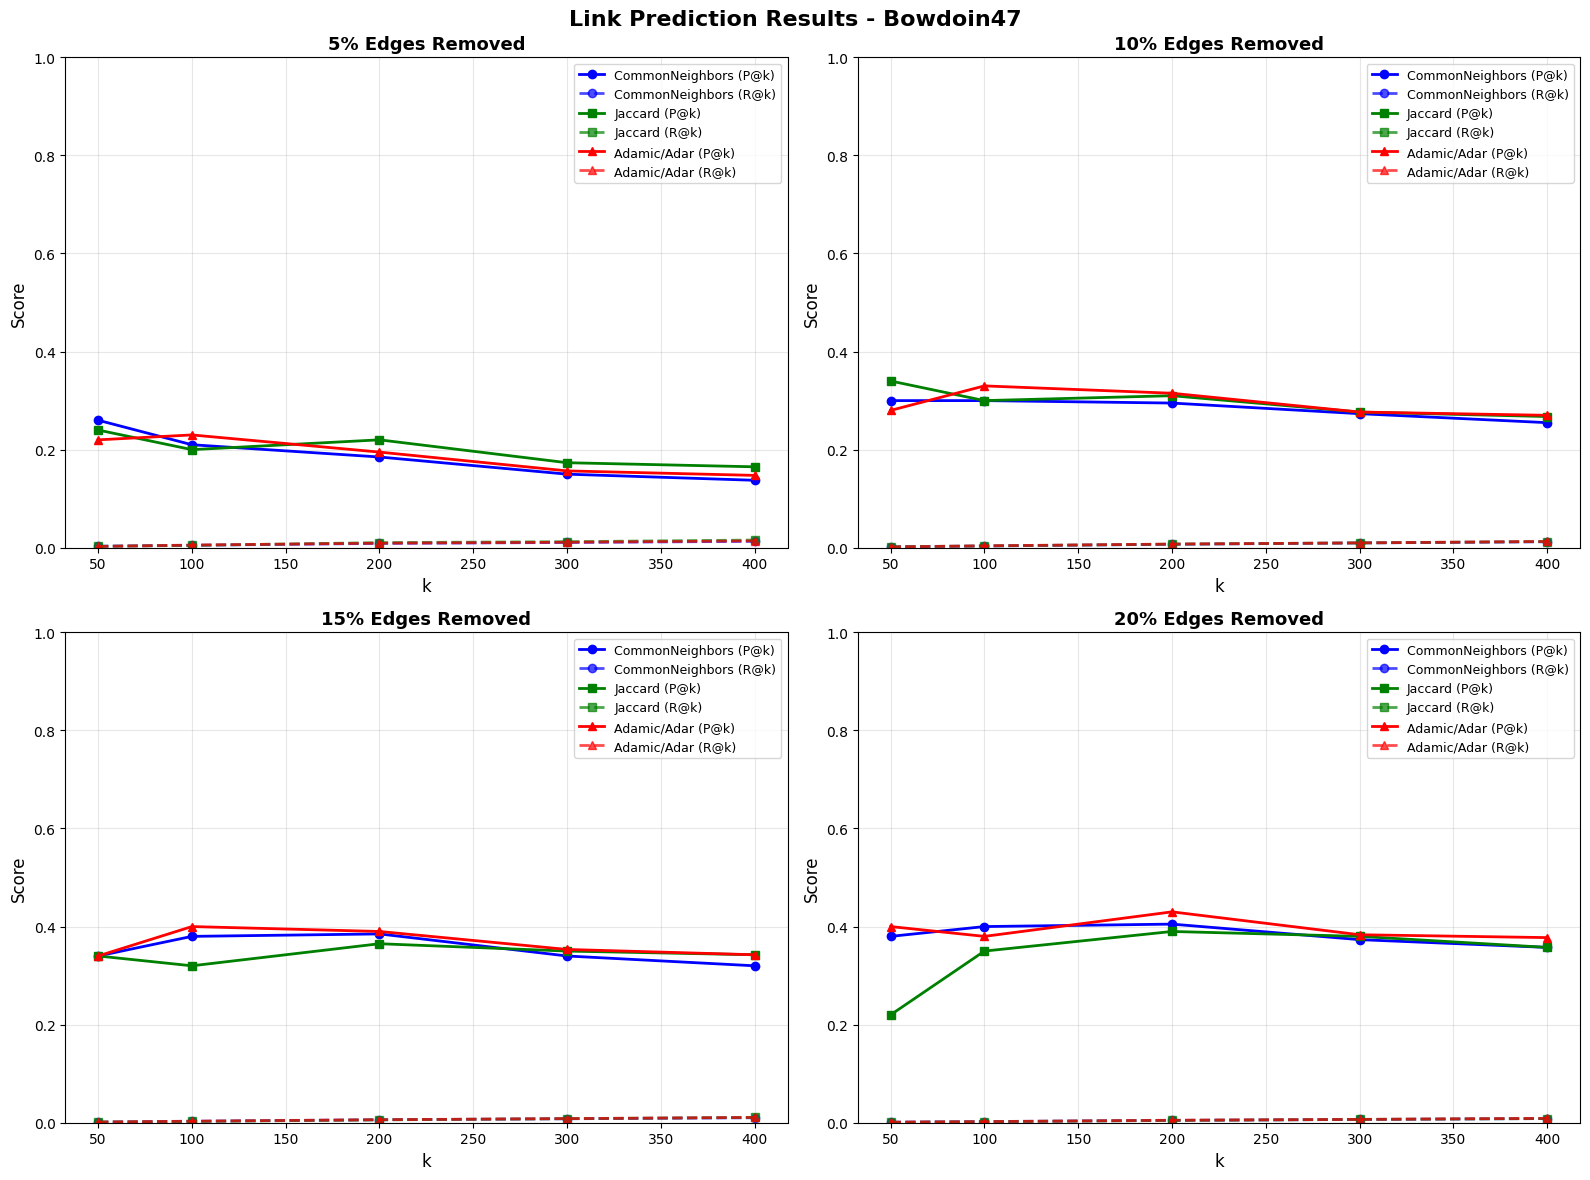


Processing Wellesley22 (2970 nodes, 94899 edges)

  Testing with 5% edges removed...
    Removed 4744 edges
    Running CommonNeighbors... P@100=0.210, R@100=0.004
    Running Jaccard... P@100=0.140, R@100=0.003
    Running Adamic/Adar... P@100=0.210, R@100=0.004

  Testing with 10% edges removed...
    Removed 9489 edges
    Running CommonNeighbors... P@100=0.360, R@100=0.004
    Running Jaccard... P@100=0.290, R@100=0.003
    Running Adamic/Adar... P@100=0.400, R@100=0.004

  Testing with 15% edges removed...
    Removed 14234 edges
    Running CommonNeighbors... P@100=0.420, R@100=0.003
    Running Jaccard... P@100=0.380, R@100=0.003
    Running Adamic/Adar... P@100=0.460, R@100=0.003

  Testing with 20% edges removed...
    Removed 18979 edges
    Running CommonNeighbors... P@100=0.510, R@100=0.003
    Running Jaccard... P@100=0.310, R@100=0.002
    Running Adamic/Adar... P@100=0.500, R@100=0.003


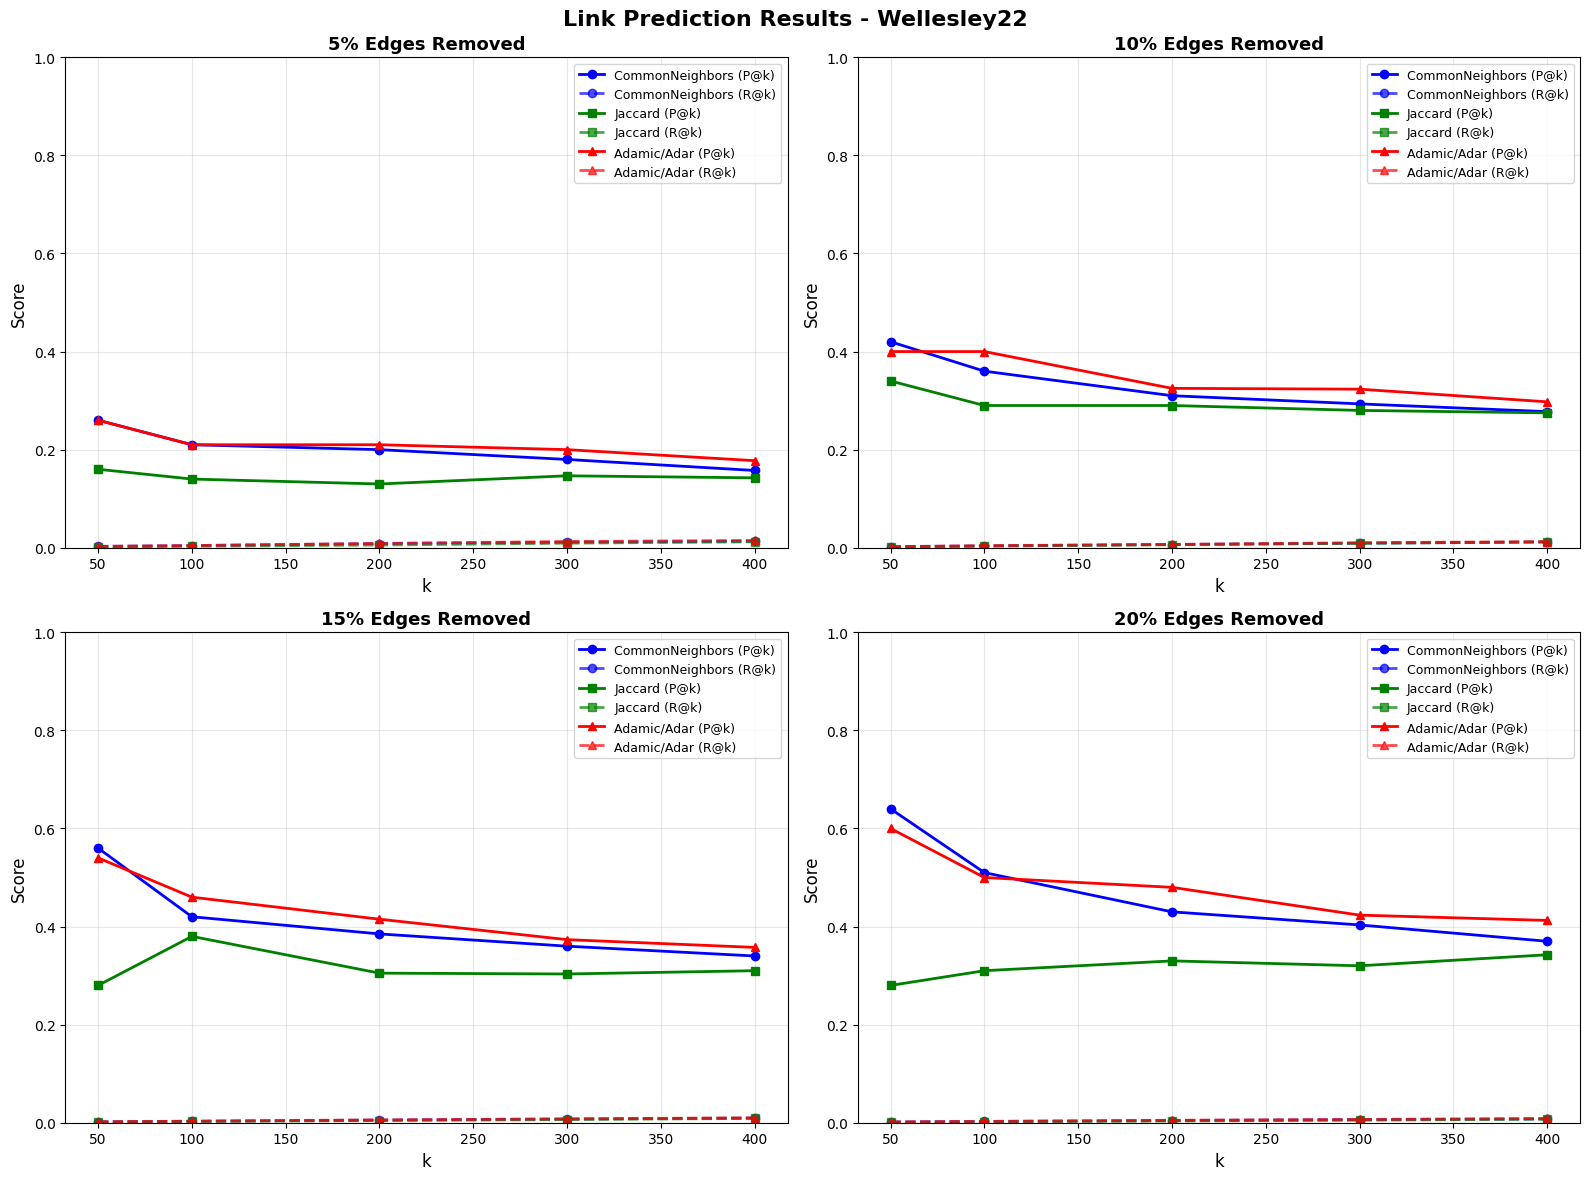


Processing Brandeis99 (3887 nodes, 137561 edges)

  Testing with 5% edges removed...
    Removed 6878 edges
    Running CommonNeighbors... P@100=0.170, R@100=0.002
    Running Jaccard... P@100=0.070, R@100=0.001
    Running Adamic/Adar... P@100=0.170, R@100=0.002

  Testing with 10% edges removed...
    Removed 13756 edges
    Running CommonNeighbors... P@100=0.250, R@100=0.002
    Running Jaccard... P@100=0.180, R@100=0.001
    Running Adamic/Adar... P@100=0.240, R@100=0.002

  Testing with 15% edges removed...
    Removed 20634 edges
    Running CommonNeighbors... P@100=0.360, R@100=0.002
    Running Jaccard... P@100=0.170, R@100=0.001
    Running Adamic/Adar... P@100=0.340, R@100=0.002

  Testing with 20% edges removed...
    Removed 27512 edges
    Running CommonNeighbors... P@100=0.430, R@100=0.002
    Running Jaccard... P@100=0.200, R@100=0.001
    Running Adamic/Adar... P@100=0.400, R@100=0.001


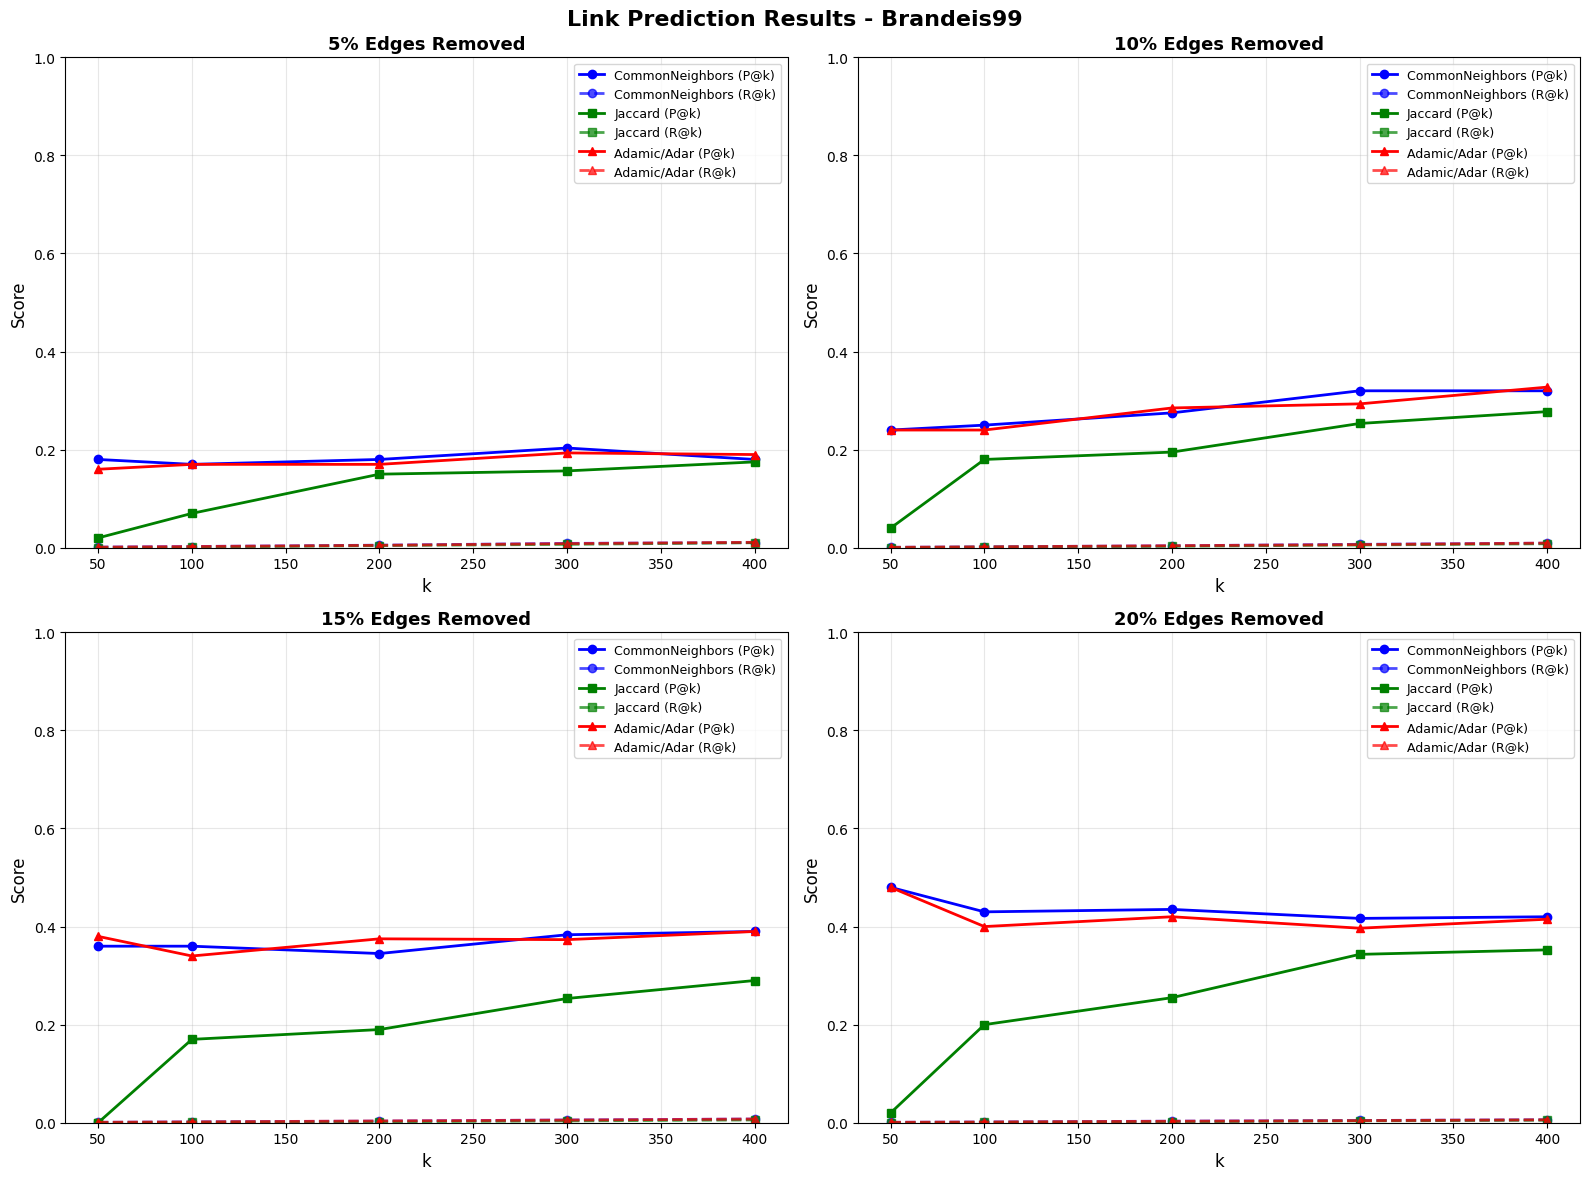


Processing Carnegie49 (6621 nodes, 249959 edges)

  Testing with 5% edges removed...
    Removed 12497 edges
    Running CommonNeighbors... P@100=0.450, R@100=0.004
    Running Jaccard... P@100=0.150, R@100=0.001
    Running Adamic/Adar... P@100=0.480, R@100=0.004

  Testing with 10% edges removed...
    Removed 24995 edges
    Running CommonNeighbors... P@100=0.680, R@100=0.003
    Running Jaccard... P@100=0.210, R@100=0.001
    Running Adamic/Adar... P@100=0.670, R@100=0.003

  Testing with 15% edges removed...
    Removed 37493 edges
    Running CommonNeighbors... P@100=0.740, R@100=0.002
    Running Jaccard... P@100=0.210, R@100=0.001
    Running Adamic/Adar... P@100=0.740, R@100=0.002

  Testing with 20% edges removed...
    Removed 49991 edges
    Running CommonNeighbors... P@100=0.760, R@100=0.002
    Running Jaccard... P@100=0.180, R@100=0.000
    Running Adamic/Adar... P@100=0.740, R@100=0.001


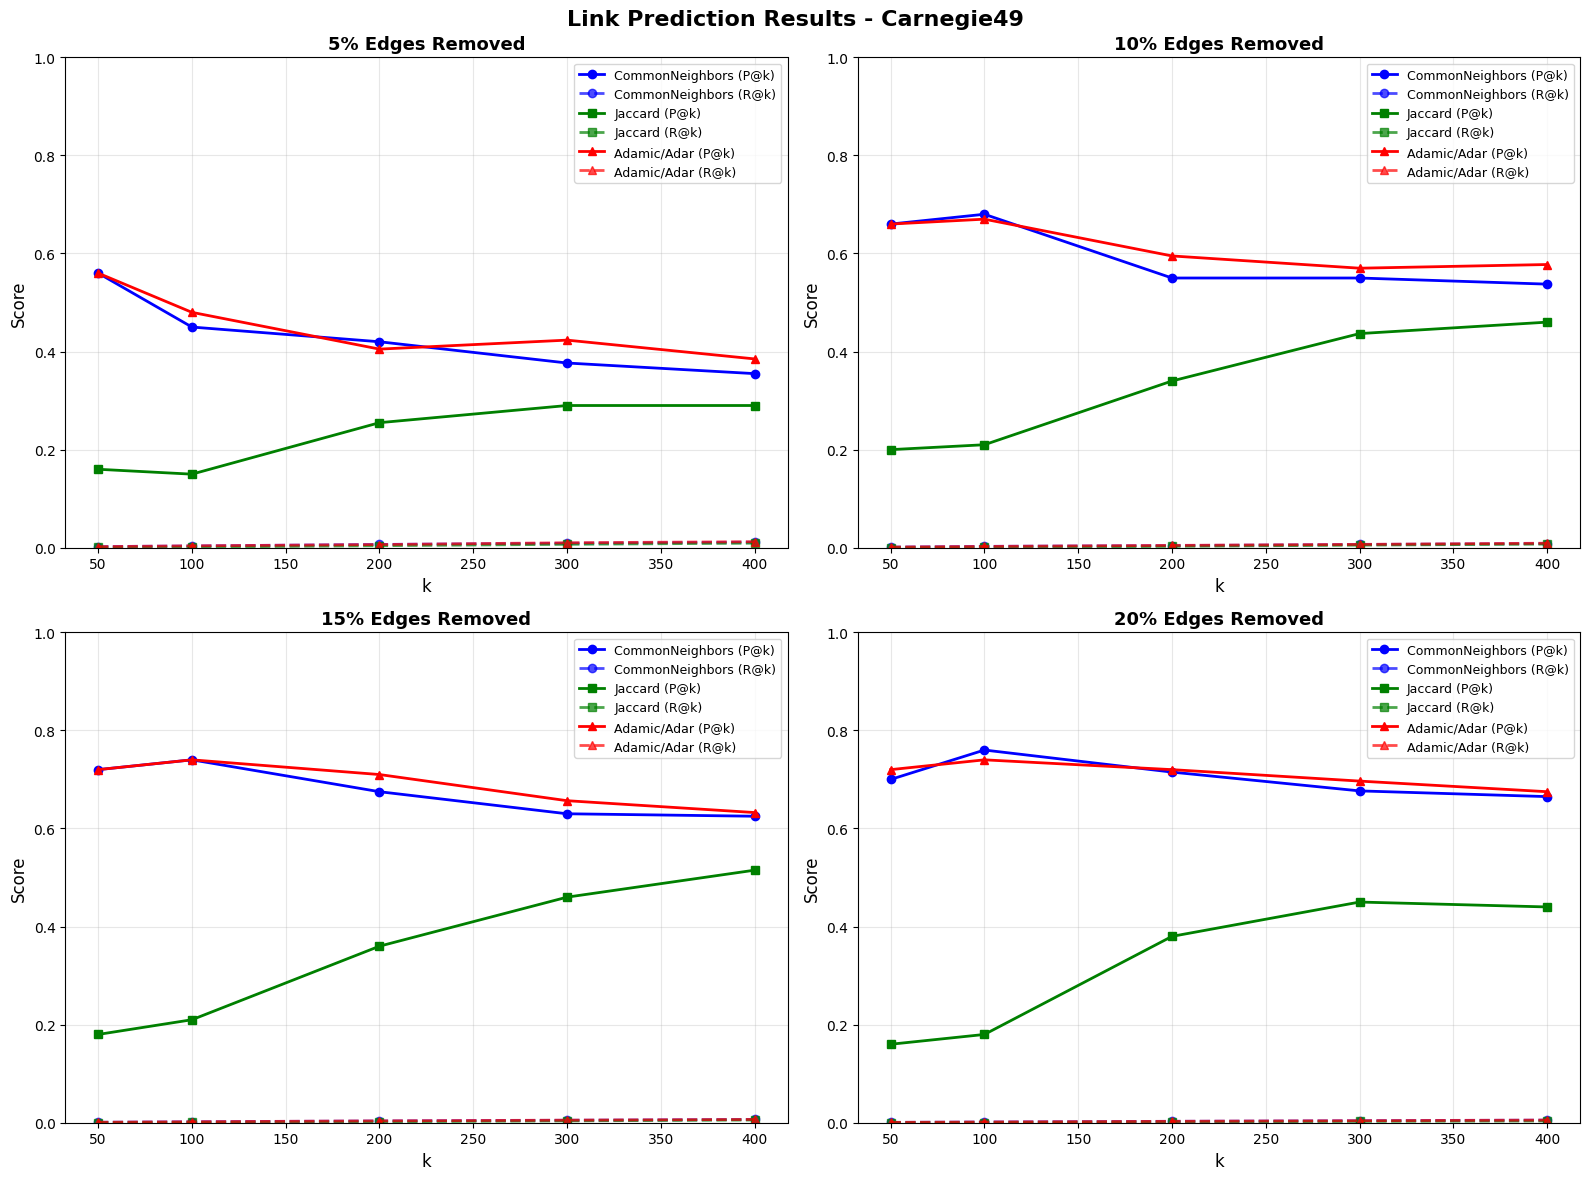


Processing Lehigh96 (5073 nodes, 198346 edges)

  Testing with 5% edges removed...
    Removed 9917 edges
    Running CommonNeighbors... P@100=0.340, R@100=0.003
    Running Jaccard... P@100=0.330, R@100=0.003
    Running Adamic/Adar... P@100=0.300, R@100=0.003

  Testing with 10% edges removed...
    Removed 19834 edges
    Running CommonNeighbors... P@100=0.520, R@100=0.003
    Running Jaccard... P@100=0.400, R@100=0.002
    Running Adamic/Adar... P@100=0.510, R@100=0.003

  Testing with 15% edges removed...
    Removed 29751 edges
    Running CommonNeighbors... P@100=0.620, R@100=0.002
    Running Jaccard... P@100=0.480, R@100=0.002
    Running Adamic/Adar... P@100=0.610, R@100=0.002

  Testing with 20% edges removed...
    Removed 39669 edges
    Running CommonNeighbors... P@100=0.640, R@100=0.002
    Running Jaccard... P@100=0.410, R@100=0.001
    Running Adamic/Adar... P@100=0.620, R@100=0.002


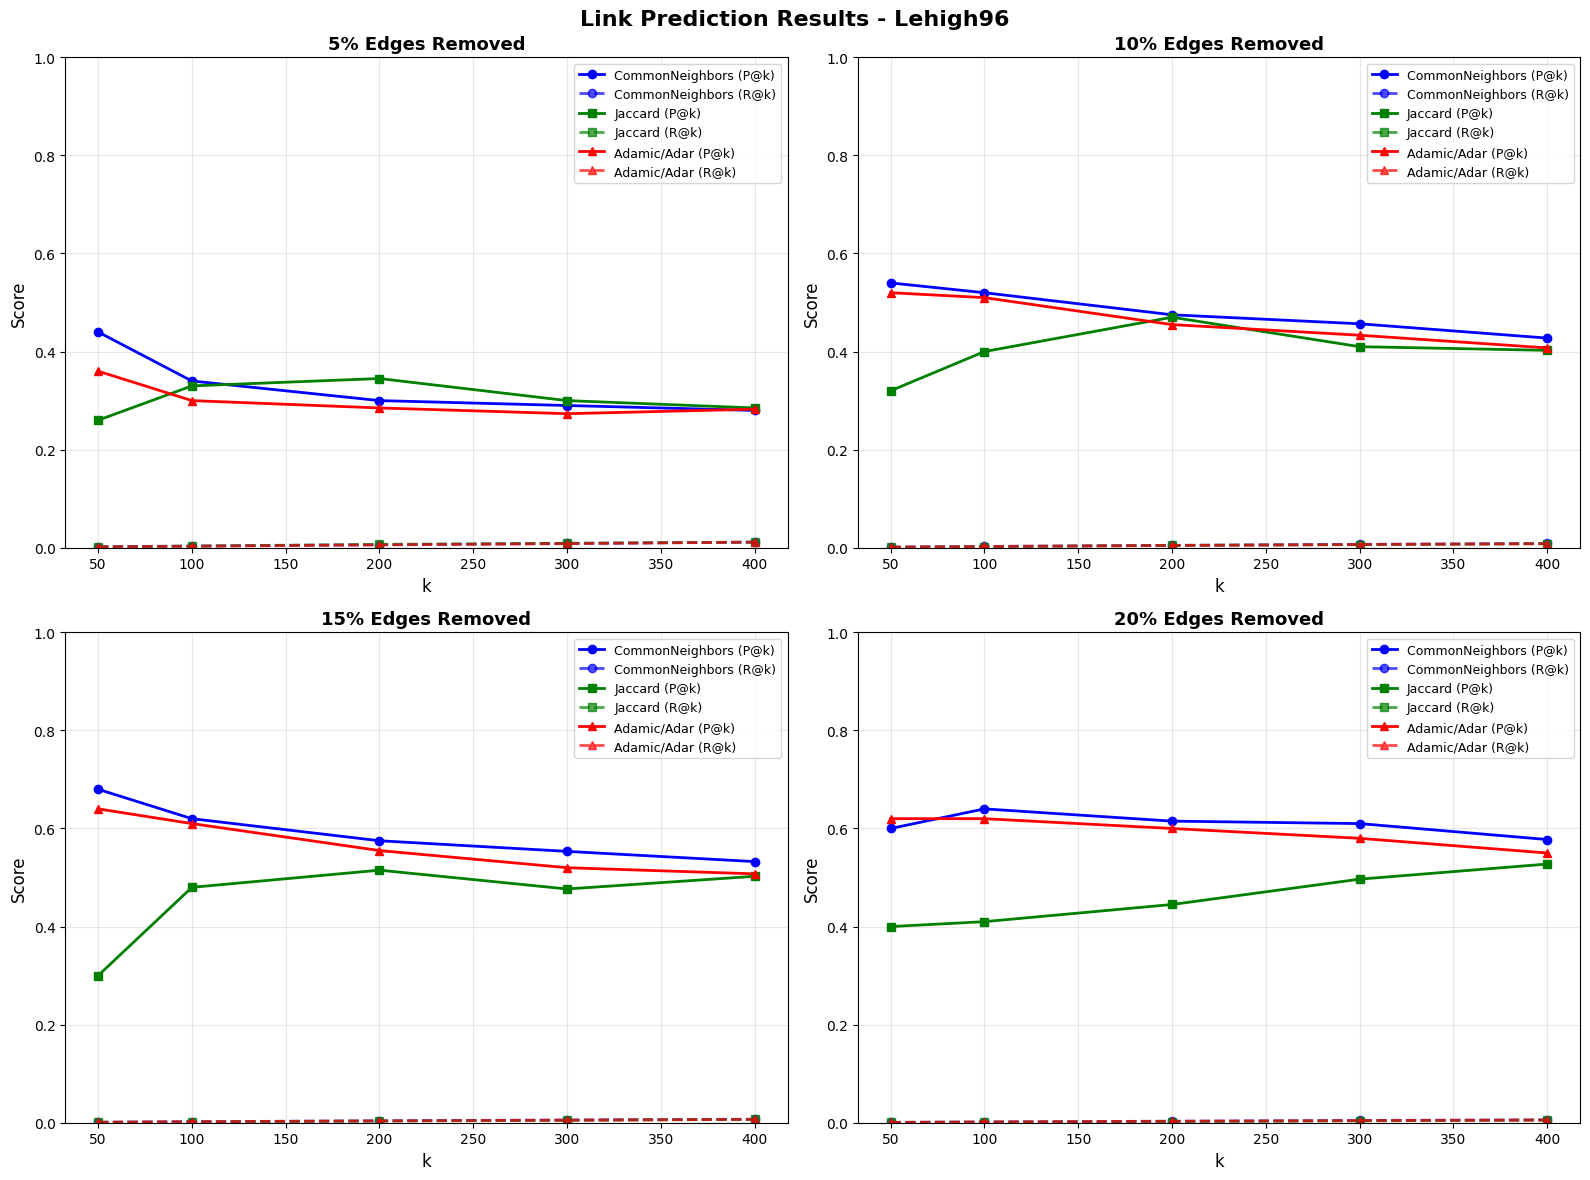


✅ All results saved to 'link_prediction_results.csv'

TABLE: Link Prediction Performance (Precision@100 and Recall@100)

** PRECISION@100 **
fraction_removed   0.05   0.10   0.15   0.20
algorithm                                   
Adamic/Adar       0.260  0.402  0.475  0.497
CommonNeighbors   0.257  0.400  0.469  0.510
Jaccard           0.209  0.301  0.342  0.344

** RECALL@100 **
fraction_removed      0.05      0.10      0.15      0.20
algorithm                                               
Adamic/Adar       0.010908  0.008279  0.006428  0.005000
CommonNeighbors   0.010568  0.008283  0.006305  0.005164
Jaccard           0.008421  0.006351  0.004906  0.004049

TABLE: Link Prediction Performance (Precision@400 and Recall@400)

** PRECISION@100 **
fraction_removed     0.05     0.10    0.15    0.20
algorithm                                         
Adamic/Adar       0.20475  0.33325  0.4040  0.4450
CommonNeighbors   0.19300  0.32175  0.3955  0.4350
Jaccard           0.20275  0.31250  0.

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from abc import ABC, abstractmethod
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# LINK PREDICTION METRICS IMPLEMENTATION (Following Homework Spec)
# ============================================================================

class LinkPrediction(ABC):
    """Base class for link prediction algorithms (from homework listing 1)"""
    
    def __init__(self, graph):
        """
        Constructor
        
        Parameters
        ----------
        graph : NetworkX graph
        """
        self.graph = graph
        self.N = len(graph)
        self.scores = {}
    
    def neighbors(self, v):
        """
        Return the neighbors list of a node
        
        Parameters
        ----------
        v : int
            node id
        
        Return
        ------
        neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)
    
    @abstractmethod
    def fit(self):
        """Compute link prediction scores for all node pairs"""
        raise NotImplementedError("Fit must be implemented")
    
    def predict(self, k=100):
        """
        Return top k node pairs by score
        
        Parameters
        ----------
        k : int
            Number of top predictions to return
            
        Return
        ------
        predictions : list of tuples
            [(node1, node2, score), ...]
        """
        if not self.scores:
            raise ValueError("Must call fit() before predict()")
        
        sorted_pairs = sorted(self.scores.items(), key=lambda x: x[1], reverse=True)
        return sorted_pairs[:k]


class CommonNeighbors(LinkPrediction):
    """Common Neighbors metric - DO NOT use NetworkX implementation"""
    
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)
    
    def fit(self):
        """Compute common neighbors score for all node pairs"""
        nodes = list(self.graph.nodes())
        
        # Cache neighbors for efficiency
        neighbors_dict = {node: set(self.neighbors(node)) for node in nodes}
        
        # Compute for all node pairs (step 3 in homework: |V| x |V|)
        for i, u in enumerate(nodes):
            for v in nodes[i+1:]:
                if self.graph.has_edge(u, v):
                    continue
                
                # Common neighbors = |Γ(u) ∩ Γ(v)|
                common = neighbors_dict[u] & neighbors_dict[v]
                score = len(common)
                
                if score > 0:
                    self.scores[(u, v)] = score
        
        return self


class Jaccard(LinkPrediction):
    """Jaccard Coefficient - DO NOT use NetworkX implementation"""
    
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)
    
    def fit(self):
        """Compute Jaccard coefficient for all node pairs"""
        nodes = list(self.graph.nodes())
        neighbors_dict = {node: set(self.neighbors(node)) for node in nodes}
        
        for i, u in enumerate(nodes):
            for v in nodes[i+1:]:
                if self.graph.has_edge(u, v):
                    continue
                
                # Jaccard = |Γ(u) ∩ Γ(v)| / |Γ(u) ∪ Γ(v)|
                neighbors_u = neighbors_dict[u]
                neighbors_v = neighbors_dict[v]
                
                intersection = neighbors_u & neighbors_v
                union = neighbors_u | neighbors_v
                
                if len(union) > 0:
                    score = len(intersection) / len(union)
                    if score > 0:
                        self.scores[(u, v)] = score
        
        return self


class AdamicAdar(LinkPrediction):
    """Adamic/Adar metric - DO NOT use NetworkX implementation"""
    
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)
    
    def fit(self):
        """Compute Adamic/Adar score for all node pairs"""
        nodes = list(self.graph.nodes())
        neighbors_dict = {node: set(self.neighbors(node)) for node in nodes}
        degrees = dict(self.graph.degree())
        
        for i, u in enumerate(nodes):
            for v in nodes[i+1:]:
                if self.graph.has_edge(u, v):
                    continue
                
                # Adamic/Adar = Σ 1/log(|Γ(z)|) for z ∈ Γ(u) ∩ Γ(v)
                common_neighbors = neighbors_dict[u] & neighbors_dict[v]
                
                score = 0.0
                for w in common_neighbors:
                    degree_w = degrees[w]
                    if degree_w > 1:
                        score += 1.0 / np.log(degree_w)
                
                if score > 0:
                    self.scores[(u, v)] = score
        
        return self


# ============================================================================
# EVALUATION FRAMEWORK (Following Homework Spec Part c)
# ============================================================================

def remove_edges_randomly(G, fraction=0.1, seed=42):
    """
    Step 2: Randomly remove fraction f of edges
    
    Parameters
    ----------
    G : NetworkX graph
    fraction : float
        Fraction of edges to remove (f ∈ [0.05, 0.1, 0.15, 0.2])
    seed : int
        Random seed for reproducibility
        
    Return
    ------
    G_train : NetworkX graph
        Graph with edges removed
    removed_edges : set
        Set of removed edges (E_removed)
    """
    random.seed(seed)
    np.random.seed(seed)
    
    G_train = G.copy()
    edges = list(G_train.edges())
    n_remove = int(len(edges) * fraction)
    
    # Randomly select edges to remove
    removed_edges = random.sample(edges, n_remove)
    G_train.remove_edges_from(removed_edges)
    
    # Normalize edge direction (u < v)
    removed_edges_normalized = set()
    for u, v in removed_edges:
        if u < v:
            removed_edges_normalized.add((u, v))
        else:
            removed_edges_normalized.add((v, u))
    
    return G_train, removed_edges_normalized


def evaluate_link_prediction(predictor, removed_edges, k_values=[50, 100, 200, 300, 400]):
    """
    Step 5: Compute Precision@k, Recall@k, and Top@k
    
    Following homework specification:
    - Precision@k = |TP| / (|TP| + |FP|) = |TP| / k
    - Recall@k = |TP| / (|TP| + |FN|) = |TP| / |E_removed|
    - Top@k = |E_removed ∩ E_predict^(top@k)| / |E_removed|
    
    Parameters
    ----------
    predictor : LinkPrediction object (already fitted)
    removed_edges : set
        Set of removed edges (ground truth E_removed)
    k_values : list
        List of k values to evaluate (k = 50, 100, 200, ..., 400)
        
    Return
    ------
    results : list of dict
        Results for each k value
    """
    results = []
    
    # Get all predictions sorted by score (step 4)
    all_predictions = predictor.predict(k=max(k_values))
    
    total_removed = len(removed_edges)
    
    for k in k_values:
        # Step 4: Take first k pairs (E_predict^(top@k))
        top_k_pairs = [pair for pair, score in all_predictions[:k]]
        top_k_set = set(top_k_pairs)
        
        # Step 5: Compute intersection |E_removed ∩ E_predict^(top@k)|
        true_positives = len(top_k_set & removed_edges)
        false_positives = k - true_positives
        false_negatives = total_removed - true_positives
        
        # Precision@k = TP / k
        precision = true_positives / k if k > 0 else 0
        
        # Recall@k = TP / total_removed
        recall = true_positives / total_removed if total_removed > 0 else 0
        
        # Top@k rate (from homework definition)
        top_k_rate = true_positives / total_removed if total_removed > 0 else 0
        
        results.append({
            'k': k,
            'precision': precision,
            'recall': recall,
            'top_k_rate': top_k_rate,
            'true_positives': true_positives,
            'false_positives': false_positives,
            'false_negatives': false_negatives
        })
    
    return results


# ============================================================================
# EXPERIMENTS (Part d: Multiple graphs)
# ============================================================================

def run_link_prediction_experiment(network_name, G, fractions=[0.05, 0.1, 0.15, 0.2], 
                                   k_values=[50, 100, 200, 300, 400]):
    """
    Run complete link prediction experiment on one network
    
    Parameters
    ----------
    network_name : str
    G : NetworkX graph
    fractions : list
        Fractions of edges to remove (f ∈ [0.05, 0.1, 0.15, 0.2])
    k_values : list
        K values for evaluation
        
    Return
    ------
    results_df : DataFrame
    """
    print(f"\n{'='*70}")
    print(f"Processing {network_name} ({len(G)} nodes, {G.number_of_edges()} edges)")
    print(f"{'='*70}")
    
    all_results = []
    
    for fraction in fractions:
        print(f"\n  Testing with {int(fraction*100)}% edges removed...")
        
        # Step 2: Remove edges
        G_train, removed_edges = remove_edges_randomly(G, fraction=fraction)
        print(f"    Removed {len(removed_edges)} edges")
        
        # Test each algorithm
        algorithms = {
            'CommonNeighbors': CommonNeighbors(G_train),
            'Jaccard': Jaccard(G_train),
            'Adamic/Adar': AdamicAdar(G_train)
        }
        
        for alg_name, predictor in algorithms.items():
            print(f"    Running {alg_name}...", end=' ')
            
            # Step 3: Fit predictor
            predictor.fit()
            
            # Step 5: Evaluate
            eval_results = evaluate_link_prediction(predictor, removed_edges, k_values)
            
            # Store results
            for result in eval_results:
                all_results.append({
                    'network': network_name,
                    'algorithm': alg_name,
                    'fraction_removed': fraction,
                    **result
                })
            
            # Print Precision@100 and Recall@100
            result_100 = [r for r in eval_results if r['k'] == 100][0]
            print(f"P@100={result_100['precision']:.3f}, R@100={result_100['recall']:.3f}")
    
    return pd.DataFrame(all_results)


def plot_link_prediction_results(df, network_name):
    """
    Plot Precision@k and Recall@k curves (like Hung's Figure 5)
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Link Prediction Results - {network_name}', fontsize=16, fontweight='bold')
    
    fractions = sorted(df['fraction_removed'].unique())
    algorithms = df['algorithm'].unique()
    colors = {'CommonNeighbors': 'blue', 'Jaccard': 'green', 'Adamic/Adar': 'red'}
    markers = {'CommonNeighbors': 'o', 'Jaccard': 's', 'Adamic/Adar': '^'}
    
    # Plot each fraction
    for idx, fraction in enumerate(fractions):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        
        df_frac = df[df['fraction_removed'] == fraction]
        
        for alg in algorithms:
            df_alg = df_frac[df_frac['algorithm'] == alg]
            
            # Plot Precision@k
            ax.plot(df_alg['k'], df_alg['precision'], 
                   marker=markers.get(alg, 'o'), 
                   label=f'{alg} (P@k)', 
                   color=colors.get(alg, 'black'),
                   linewidth=2, markersize=6)
            
            # Plot Recall@k (dashed line)
            ax.plot(df_alg['k'], df_alg['recall'], 
                   marker=markers.get(alg, 'o'), 
                   label=f'{alg} (R@k)', 
                   color=colors.get(alg, 'black'),
                   linestyle='--', linewidth=2, markersize=6, alpha=0.7)
        
        ax.set_xlabel('k', fontsize=12)
        ax.set_ylabel('Score', fontsize=12)
        ax.set_title(f'{int(fraction*100)}% Edges Removed', fontsize=13, fontweight='bold')
        ax.legend(fontsize=9, loc='best')
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0, 1.0])
    
    plt.tight_layout()
    plt.savefig(f'link_prediction_{network_name}.png', dpi=300, bbox_inches='tight')
    plt.show()


def create_summary_table(df, k=100):
    """
    Create summary table like Hung's Table 2
    """
    print("\n" + "="*80)
    print(f"TABLE: Link Prediction Performance (Precision@{k} and Recall@{k})")
    print("="*80)
    
    df_k = df[df['k'] == k].copy()
    
    # Pivot for Precision
    pivot_precision = df_k.pivot_table(
        index='algorithm',
        columns='fraction_removed',
        values='precision',
        aggfunc='mean'
    )
    
    # Pivot for Recall
    pivot_recall = df_k.pivot_table(
        index='algorithm',
        columns='fraction_removed',
        values='recall',
        aggfunc='mean'
    )
    
    print("\n** PRECISION@100 **")
    print(pivot_precision.to_string())
    
    print("\n** RECALL@100 **")
    print(pivot_recall.to_string())
    
    print("="*80)


# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main execution - Part (d): Choose multiple graphs"""
    
    DATA_PATH = Path('./data')
    
    # Select ~10 networks of various sizes (Part d requirement: > 10 graphs)
    network_files = [
        'Caltech36.gml',
        'Reed98.gml',
        'Haverford76.gml',
        'Swarthmore42.gml',
        'Amherst41.gml',
        'Bowdoin47.gml',
        'Wellesley22.gml',
        'Brandeis99.gml',
        'Carnegie49.gml',
        'Lehigh96.gml'
    ]
    
    all_results = []
    
    for net_file in network_files:
        try:
            # Load network (Part c: Select graph G_fb)
            G = nx.read_gml(DATA_PATH / net_file)
            G_lcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
            
            network_name = net_file.replace('.gml', '')
            
            # Run experiment
            results_df = run_link_prediction_experiment(
                network_name, G_lcc, 
                fractions=[0.05, 0.1, 0.15, 0.2],  # Part c: f ∈ [0.05, 0.1, 0.15, 0.2]
                k_values=[50, 100, 200, 300, 400]  # Part c: k = 50, 100, 200, ..., 400
            )
            
            all_results.append(results_df)
            
            # Plot results
            plot_link_prediction_results(results_df, network_name)
            
        except Exception as e:
            print(f"Error processing {net_file}: {e}")
    
    # Combine all results
    df_all = pd.concat(all_results, ignore_index=True)
    df_all.to_csv('link_prediction_results.csv', index=False)
    print("\n✅ All results saved to 'link_prediction_results.csv'")
    
    # Summary tables
    create_summary_table(df_all, k=100)
    create_summary_table(df_all, k=400)


if __name__ == "__main__":
    main()

<h1>5: Findmissinglabelswiththelabelpropagationalgorithms</h1>


LABEL PROPAGATION EXPERIMENT
Network: Duke14

Network loaded: 9885 nodes, 506437 edges

Attribute: DORM
  Total nodes with dorm: 6995
  Unique dorm values: 135

  Testing with 10% labels removed...
    Training labels: 6296
    Test labels: 699
  Converged after 32 iterations
    Accuracy: 0.5265

  Testing with 20% labels removed...
    Training labels: 5596
    Test labels: 1399
  Converged after 32 iterations
    Accuracy: 0.5197

  Testing with 30% labels removed...
    Training labels: 4897
    Test labels: 2098
  Converged after 35 iterations
    Accuracy: 0.5033

Attribute: MAJOR
  ERROR: No valid major data found!

Attribute: GENDER
  Total nodes with gender: 9038
  Unique gender values: 2

  Testing with 10% labels removed...
    Training labels: 8135
    Test labels: 903
  Converged after 12 iterations
    Accuracy: 0.6689

  Testing with 20% labels removed...
    Training labels: 7231
    Test labels: 1807
  Converged after 13 iterations
    Accuracy: 0.6807

  Testing with

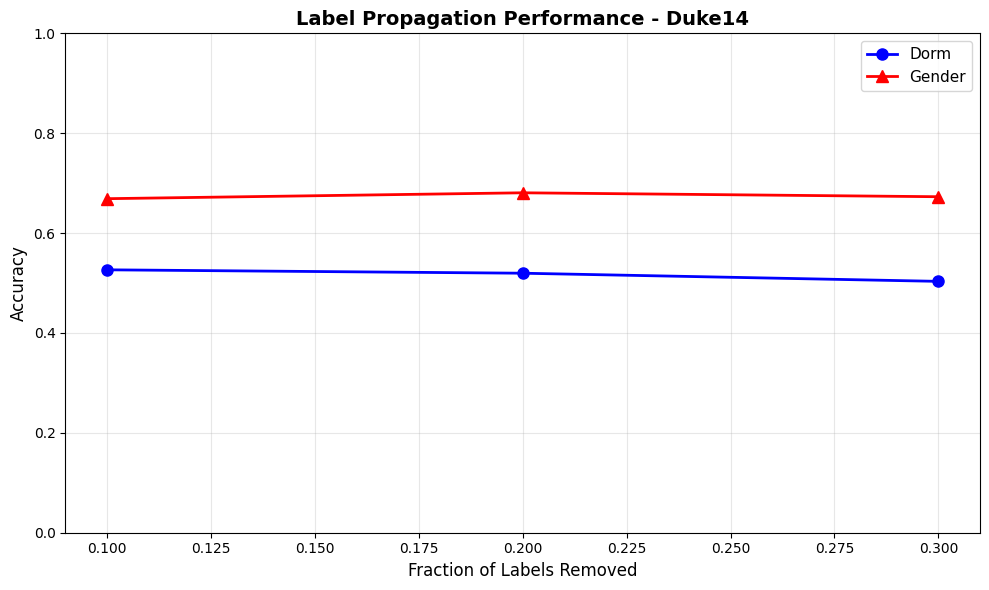


✅ Plot saved to 'label_propagation_Duke14.png'


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART B: Label Propagation Implementation
# ============================================================================

class LabelPropagation:
    """
    Semi-supervised Label Propagation Algorithm
    Based on Zhou et al. (2004) formulation:
    Y^(t+1) = α * T * Y^(t) + (1-α) * Y^(0)
    
    where:
    - T is the normalized transition matrix
    - Y^(0) is the initial label matrix
    - α controls neighbor influence vs. original labels
    """
    
    def __init__(self, alpha=0.85, max_iter=100, tol=1e-4):
        """
        Parameters
        ----------
        alpha : float, default=0.85
            Clamping factor (balance between neighbors and original labels)
        max_iter : int, default=100
            Maximum number of iterations
        tol : float, default=1e-4
            Convergence tolerance
        """
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.label_distributions_ = None
        
    def fit(self, graph, labeled_nodes, labels):
        """
        Fit the label propagation model
        
        Parameters
        ----------
        graph : NetworkX graph
            The network
        labeled_nodes : list
            Nodes with known labels
        labels : dict
            Dictionary {node: label} for labeled nodes
            
        Returns
        -------
        self
        """
        # Convert graph to adjacency matrix
        nodes = list(graph.nodes())
        n_nodes = len(nodes)
        node_to_idx = {node: idx for idx, node in enumerate(nodes)}
        
        # Create adjacency matrix
        A = nx.adjacency_matrix(graph, nodelist=nodes).toarray()
        
        # Compute transition matrix T (row-normalized)
        # T[i,j] = A[i,j] / sum(A[i,:])
        D_inv = np.diag(1.0 / (A.sum(axis=1) + 1e-10))  
        T = D_inv @ A
        
        # Get unique labels
        unique_labels = sorted(set(labels.values()))
        n_labels = len(unique_labels)
        label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
        
        # Initialize label matrix Y
        # Y[i, c] = probability that node i has label c
        Y = np.zeros((n_nodes, n_labels))
        
        # Set known labels (one-hot encoding)
        labeled_mask = np.zeros(n_nodes, dtype=bool)
        for node, label in labels.items():
            if node in node_to_idx:
                idx = node_to_idx[node]
                label_idx = label_to_idx[label]
                Y[idx, label_idx] = 1.0
                labeled_mask[idx] = True
        
        # Save initial labels
        Y_0 = Y.copy()
        
        # Iterative propagation
        for iteration in range(self.max_iter):
            Y_old = Y.copy()
            
            # Update: Y = α * T * Y + (1-α) * Y_0
            Y = self.alpha * (T @ Y) + (1 - self.alpha) * Y_0
            
            # Clamp labeled nodes (keep original labels fixed)
            Y[labeled_mask] = Y_0[labeled_mask]
            
            # Normalize to make each row sum to 1 (probability distribution)
            row_sums = Y.sum(axis=1, keepdims=True)
            Y = Y / (row_sums + 1e-10)
            
            # Check convergence
            diff = np.abs(Y - Y_old).max()
            if diff < self.tol:
                print(f"  Converged after {iteration + 1} iterations")
                break
        
        # Store results
        self.nodes_ = nodes
        self.node_to_idx_ = node_to_idx
        self.label_to_idx_ = label_to_idx
        self.idx_to_label_ = {idx: label for label, idx in label_to_idx.items()}
        self.label_distributions_ = Y
        self.T_ = T
        
        return self
    
    def predict(self, nodes=None):
        """
        Predict labels for nodes
        
        Parameters
        ----------
        nodes : list, optional
            Nodes to predict. If None, predict for all nodes.
            
        Returns
        -------
        predictions : dict
            {node: predicted_label}
        """
        if self.label_distributions_ is None:
            raise ValueError("Model not fitted yet!")
        
        if nodes is None:
            nodes = self.nodes_
        
        predictions = {}
        for node in nodes:
            if node in self.node_to_idx_:
                idx = self.node_to_idx_[node]
                label_idx = np.argmax(self.label_distributions_[idx])
                predictions[node] = self.idx_to_label_[label_idx]
        
        return predictions
    
    def predict_proba(self, nodes=None):
        """
        Predict label probabilities for nodes
        
        Parameters
        ----------
        nodes : list, optional
            Nodes to predict. If None, predict for all nodes.
            
        Returns
        -------
        probabilities : dict
            {node: {label: probability}}
        """
        if self.label_distributions_ is None:
            raise ValueError("Model not fitted yet!")
        
        if nodes is None:
            nodes = self.nodes_
        
        probabilities = {}
        for node in nodes:
            if node in self.node_to_idx_:
                idx = self.node_to_idx_[node]
                probs = self.label_distributions_[idx]
                probabilities[node] = {
                    self.idx_to_label_[i]: prob 
                    for i, prob in enumerate(probs)
                }
        
        return probabilities


# ============================================================================
# PART C & D: Experiment Framework
# ============================================================================

def load_network_with_attributes(network_name, data_path='./data'):
    """Load a network and extract node attributes"""
    gml_file = Path(data_path) / f"{network_name}.gml"
    G = nx.read_gml(gml_file)
    
    # Extract LCC
    lcc_nodes = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(lcc_nodes).copy()
    
    return G_lcc


def get_attribute_values(G, attribute):
    """
    Extract valid attribute values from graph
    
    Returns
    -------
    attribute_dict : dict
        {node: attribute_value} for nodes with valid attributes
    """
    attribute_dict = {}
    
    for node in G.nodes():
        if attribute in G.nodes[node]:
            value = G.nodes[node][attribute]
            # Filter out missing/invalid values
            if value is not None and value != 0 and value != '' and value != '0':
                attribute_dict[node] = value
    
    return attribute_dict


def remove_labels_randomly(labels_dict, fraction, seed=42):
    """
    Randomly remove a fraction of labels
    
    Parameters
    ----------
    labels_dict : dict
        {node: label}
    fraction : float
        Fraction to remove (0.1, 0.2, 0.3)
    seed : int
        Random seed
        
    Returns
    -------
    train_labels : dict
        Remaining labels (for training)
    test_labels : dict
        Removed labels (for testing)
    """
    np.random.seed(seed)
    
    nodes = list(labels_dict.keys())
    n_remove = int(len(nodes) * fraction)
    
    # Randomly select nodes to remove
    test_nodes = np.random.choice(nodes, size=n_remove, replace=False)
    test_nodes_set = set(test_nodes)
    
    train_labels = {node: label for node, label in labels_dict.items() 
                   if node not in test_nodes_set}
    test_labels = {node: label for node, label in labels_dict.items() 
                  if node in test_nodes_set}
    
    return train_labels, test_labels


def run_label_propagation_experiment(network_name, G, attribute, 
                                     fractions=[0.1, 0.2, 0.3],
                                     alpha=0.85):
    """
    Run label propagation experiment for one attribute
    
    Parameters
    ----------
    network_name : str
    G : NetworkX graph
    attribute : str
        Attribute name ('dorm', 'major', 'gender')
    fractions : list
        Fractions of labels to remove
    alpha : float
        Label propagation parameter
        
    Returns
    -------
    results : list of dict
        Results for each fraction
    """
    print(f"\n{'='*70}")
    print(f"Attribute: {attribute.upper()}")
    print(f"{'='*70}")
    
    # Get attribute values
    labels_dict = get_attribute_values(G, attribute)
    
    if len(labels_dict) == 0:
        print(f"  ERROR: No valid {attribute} data found!")
        return []
    
    print(f"  Total nodes with {attribute}: {len(labels_dict)}")
    print(f"  Unique {attribute} values: {len(set(labels_dict.values()))}")
    
    results = []
    
    for fraction in fractions:
        print(f"\n  Testing with {int(fraction*100)}% labels removed...")
        
        # Remove labels
        train_labels, test_labels = remove_labels_randomly(labels_dict, fraction)
        print(f"    Training labels: {len(train_labels)}")
        print(f"    Test labels: {len(test_labels)}")
        
        # Run label propagation
        lp = LabelPropagation(alpha=alpha, max_iter=100, tol=1e-4)
        lp.fit(G, list(train_labels.keys()), train_labels)
        
        # Predict
        predictions = lp.predict(list(test_labels.keys()))
        
        # Evaluate
        y_true = [test_labels[node] for node in test_labels.keys()]
        y_pred = [predictions.get(node, None) for node in test_labels.keys()]
        
        # Handle missing predictions
        valid_indices = [i for i, pred in enumerate(y_pred) if pred is not None]
        y_true_valid = [y_true[i] for i in valid_indices]
        y_pred_valid = [y_pred[i] for i in valid_indices]
        
        if len(y_true_valid) > 0:
            accuracy = accuracy_score(y_true_valid, y_pred_valid)
        else:
            accuracy = 0.0
        
        print(f"    Accuracy: {accuracy:.4f}")
        
        results.append({
            'network': network_name,
            'attribute': attribute,
            'fraction_removed': fraction,
            'n_train': len(train_labels),
            'n_test': len(test_labels),
            'accuracy': accuracy
        })
    
    return results


# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main execution function"""
    
    # Select a network (choose one with good attribute coverage)
    # Duke14 is mentioned in the homework example
    network_name = 'Duke14'
    
    DATA_PATH = Path('./data')
    
    print(f"\n{'='*70}")
    print(f"LABEL PROPAGATION EXPERIMENT")
    print(f"Network: {network_name}")
    print(f"{'='*70}")
    
    # Load network
    G = load_network_with_attributes(network_name, DATA_PATH)
    print(f"\nNetwork loaded: {len(G)} nodes, {G.number_of_edges()} edges")
    
    # Test attributes
    attributes = ['dorm', 'major', 'gender']
    fractions = [0.1, 0.2, 0.3]
    
    all_results = []
    
    for attribute in attributes:
        results = run_label_propagation_experiment(
            network_name, G, attribute, 
            fractions=fractions,
            alpha=0.85
        )
        all_results.extend(results)
    
    # Create results DataFrame
    df_results = pd.DataFrame(all_results)
    
    # Save results
    df_results.to_csv('label_propagation_results.csv', index=False)
    print("\n✅ Results saved to 'label_propagation_results.csv'")
    
    # Create summary table (like Table 1 in homework)
    print(f"\n{'='*70}")
    print(f"SUMMARY TABLE: Accuracy by Attribute and Fraction Removed")
    print(f"{'='*70}")
    
    # Pivot table
    pivot_table = df_results.pivot(
        index='attribute', 
        columns='fraction_removed', 
        values='accuracy'
    )
    
    print(f"\n{network_name}")
    print(pivot_table.to_string())
    print(f"{'='*70}")
    
    # Visualize results
    plot_results(df_results, network_name)


def plot_results(df, network_name):
    """Plot accuracy vs fraction removed for each attribute"""
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    attributes = df['attribute'].unique()
    colors = {'dorm': 'blue', 'major': 'green', 'gender': 'red'}
    markers = {'dorm': 'o', 'major': 's', 'gender': '^'}
    
    for attribute in attributes:
        df_attr = df[df['attribute'] == attribute]
        ax.plot(df_attr['fraction_removed'], df_attr['accuracy'],
               marker=markers.get(attribute, 'o'),
               color=colors.get(attribute, 'black'),
               label=attribute.capitalize(),
               linewidth=2, markersize=8)
    
    ax.set_xlabel('Fraction of Labels Removed', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(f'Label Propagation Performance - {network_name}', 
                fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.0])
    
    plt.tight_layout()
    plt.savefig(f'label_propagation_{network_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Plot saved to 'label_propagation_{network_name}.png'")


if __name__ == "__main__":
    main()

In [3]:
pip install python-louvain --break-system-packages

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9402 sha256=95f6935f5eba3aa70e9ea959807974645a2567806ee0d863c22ede81282929fb
  Stored in directory: c:\users\arjun s k\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn --break-system-packages

Note: you may need to restart the kernel to use updated packages.


<h1>6: Communities detection with the FB100 datasets</h1>


Processing Caltech36
  Network: 762 nodes, 16651 edges
  Nodes with gender: 699
  Gender distribution: {'Male': 227, 'Female': 472}

  Detecting communities (Louvain)...
  Found 8 communities

  Analyzing gender composition...

  Overall Metrics:
    Number of communities: 8
    Weighted avg imbalance: 0.1753
    Significant communities: 75.00%
    Nodes in significant communities: 85.26%
    Maximum imbalance: 0.2614

  z-Rand Score: 0.6926
    (measures community-gender alignment vs. random expectation)
    w (observed pairs): 19387
    E[w] (expected): 19327.9


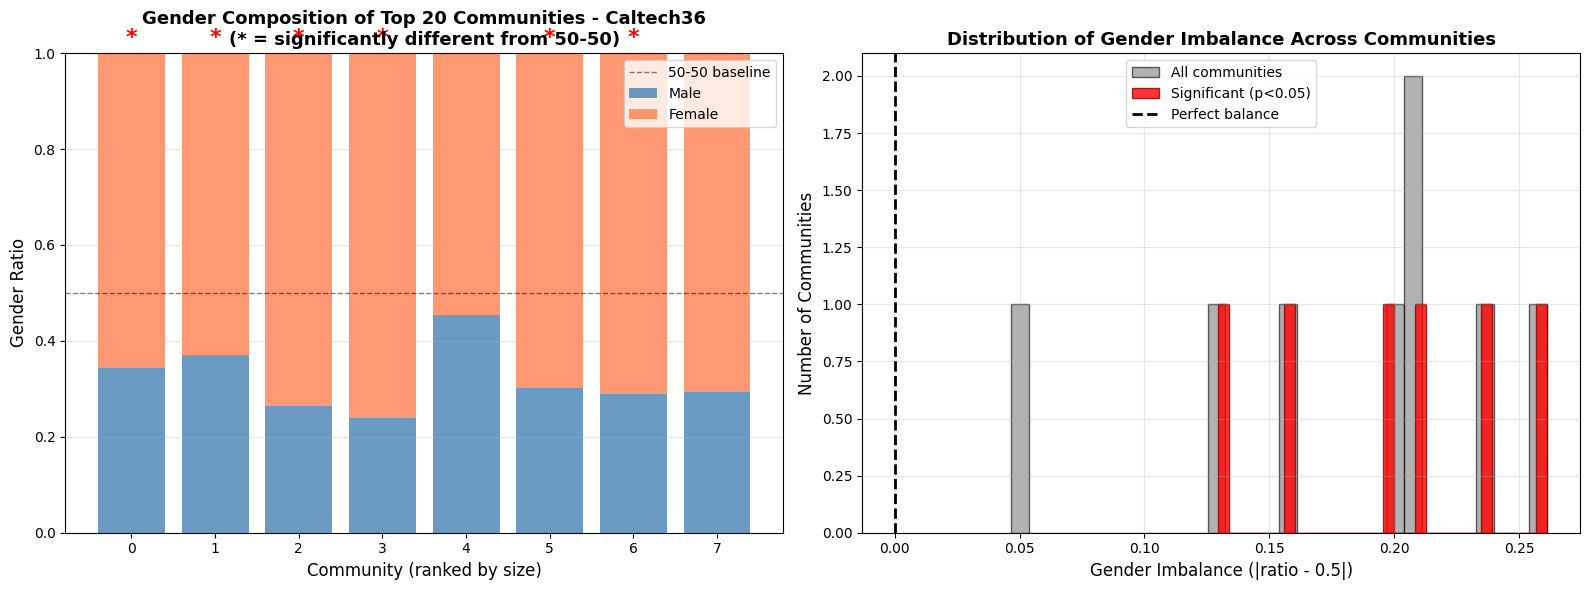


Processing Reed98
  Network: 962 nodes, 18812 edges
  Nodes with gender: 865
  Gender distribution: {'Female': 361, 'Male': 504}

  Detecting communities (Louvain)...
  Found 6 communities

  Analyzing gender composition...

  Overall Metrics:
    Number of communities: 5
    Weighted avg imbalance: 0.0827
    Significant communities: 60.00%
    Nodes in significant communities: 73.99%
    Maximum imbalance: 0.1570

  z-Rand Score: 0.2013
    (measures community-gender alignment vs. random expectation)
    w (observed pairs): 44865
    E[w] (expected): 44839.0


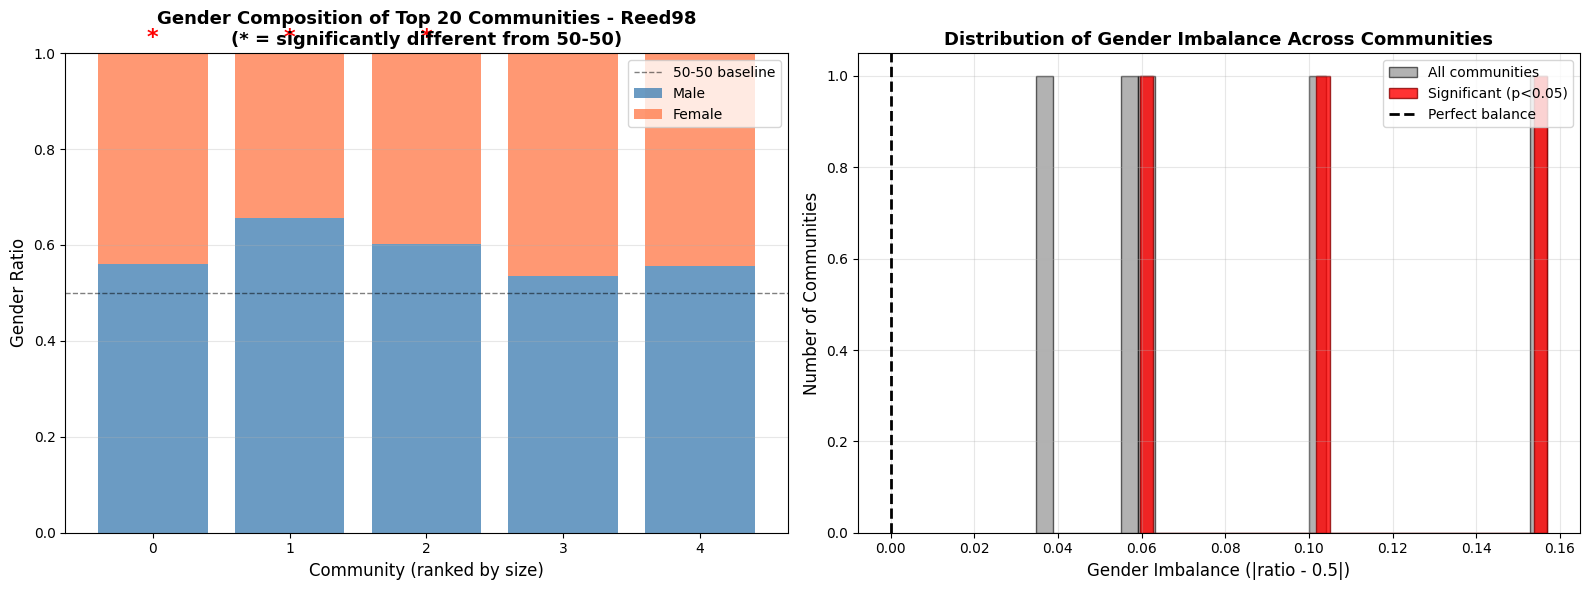


Processing Haverford76
  Network: 1446 nodes, 59589 edges
  Nodes with gender: 1350
  Gender distribution: {'Male': 732, 'Female': 618}

  Detecting communities (Louvain)...
  Found 5 communities

  Analyzing gender composition...

  Overall Metrics:
    Number of communities: 5
    Weighted avg imbalance: 0.0496
    Significant communities: 40.00%
    Nodes in significant communities: 50.67%
    Maximum imbalance: 0.0931

  z-Rand Score: 1.7618
    (measures community-gender alignment vs. random expectation)
    w (observed pairs): 112441
    E[w] (expected): 112079.7


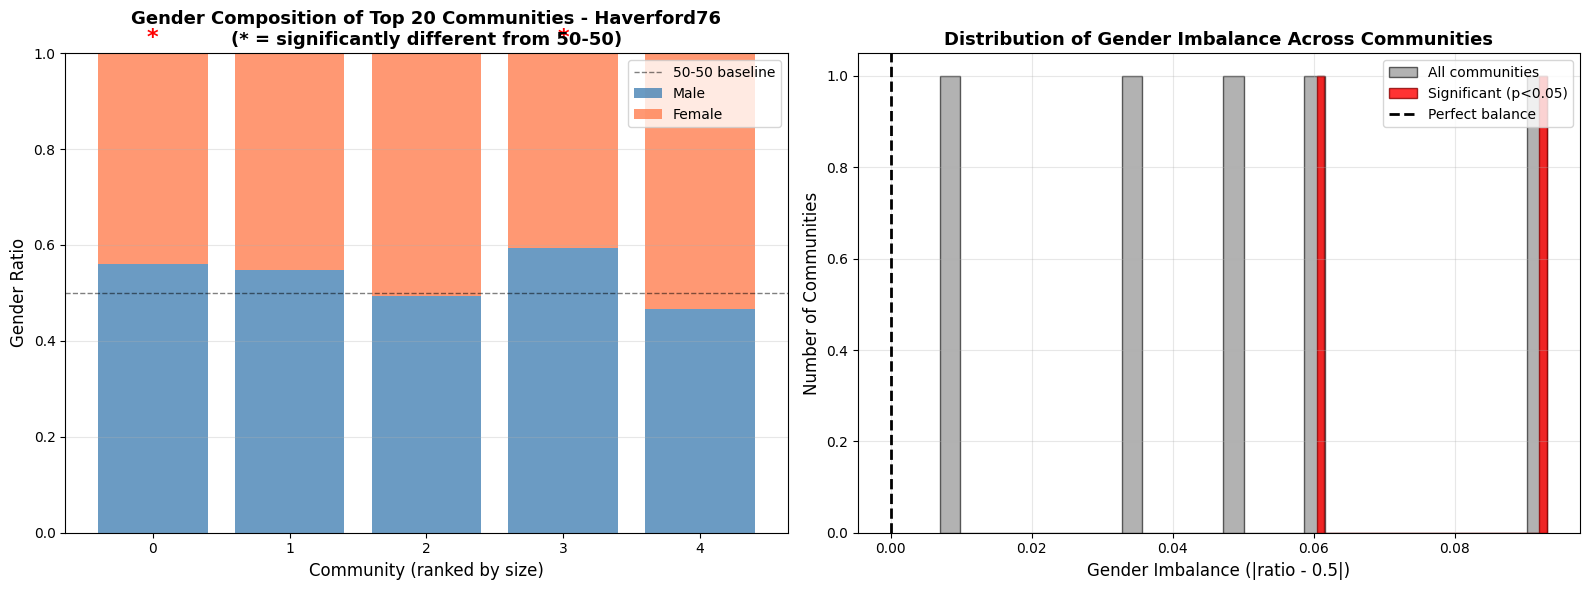


Processing Duke14
  Network: 9885 nodes, 506437 edges
  Nodes with gender: 9038
  Gender distribution: {'Female': 4672, 'Male': 4366}

  Detecting communities (Louvain)...
  Found 12 communities

  Analyzing gender composition...

  Overall Metrics:
    Number of communities: 11
    Weighted avg imbalance: 0.0423
    Significant communities: 36.36%
    Nodes in significant communities: 52.43%
    Maximum imbalance: 0.5000

  z-Rand Score: 22.6767
    (measures community-gender alignment vs. random expectation)
    w (observed pairs): 3233057
    E[w] (expected): 3206705.0


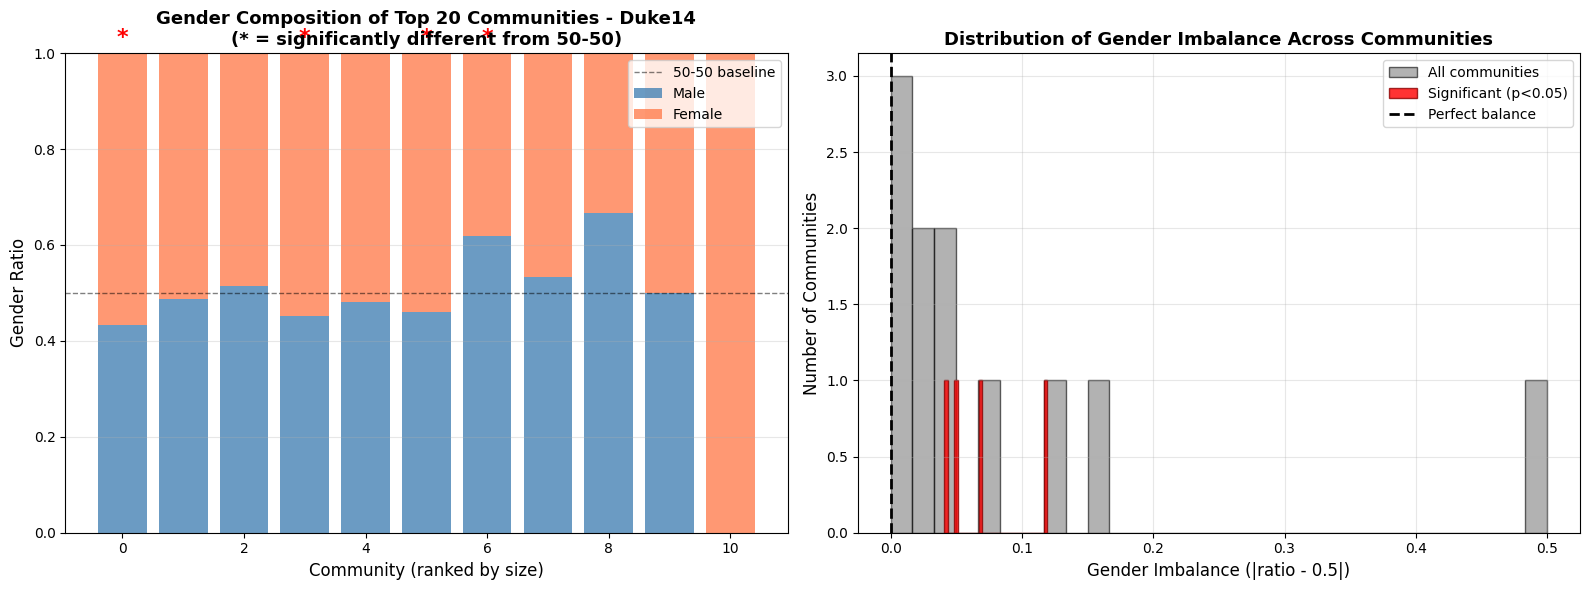


✅ Results saved to 'gender_community_analysis_results.csv'

SUMMARY TABLE: Gender Segregation at Community Level

    network  n_communities    z_rand  weighted_avg_imbalance  prop_significant_communities  prop_nodes_in_significant
  Caltech36              8  0.692557                0.175250                      0.750000                   0.852647
     Reed98              5  0.201282                0.082659                      0.600000                   0.739884
Haverford76              5  1.761778                0.049630                      0.400000                   0.506667
     Duke14             11 22.676725                0.042266                      0.363636                   0.524342


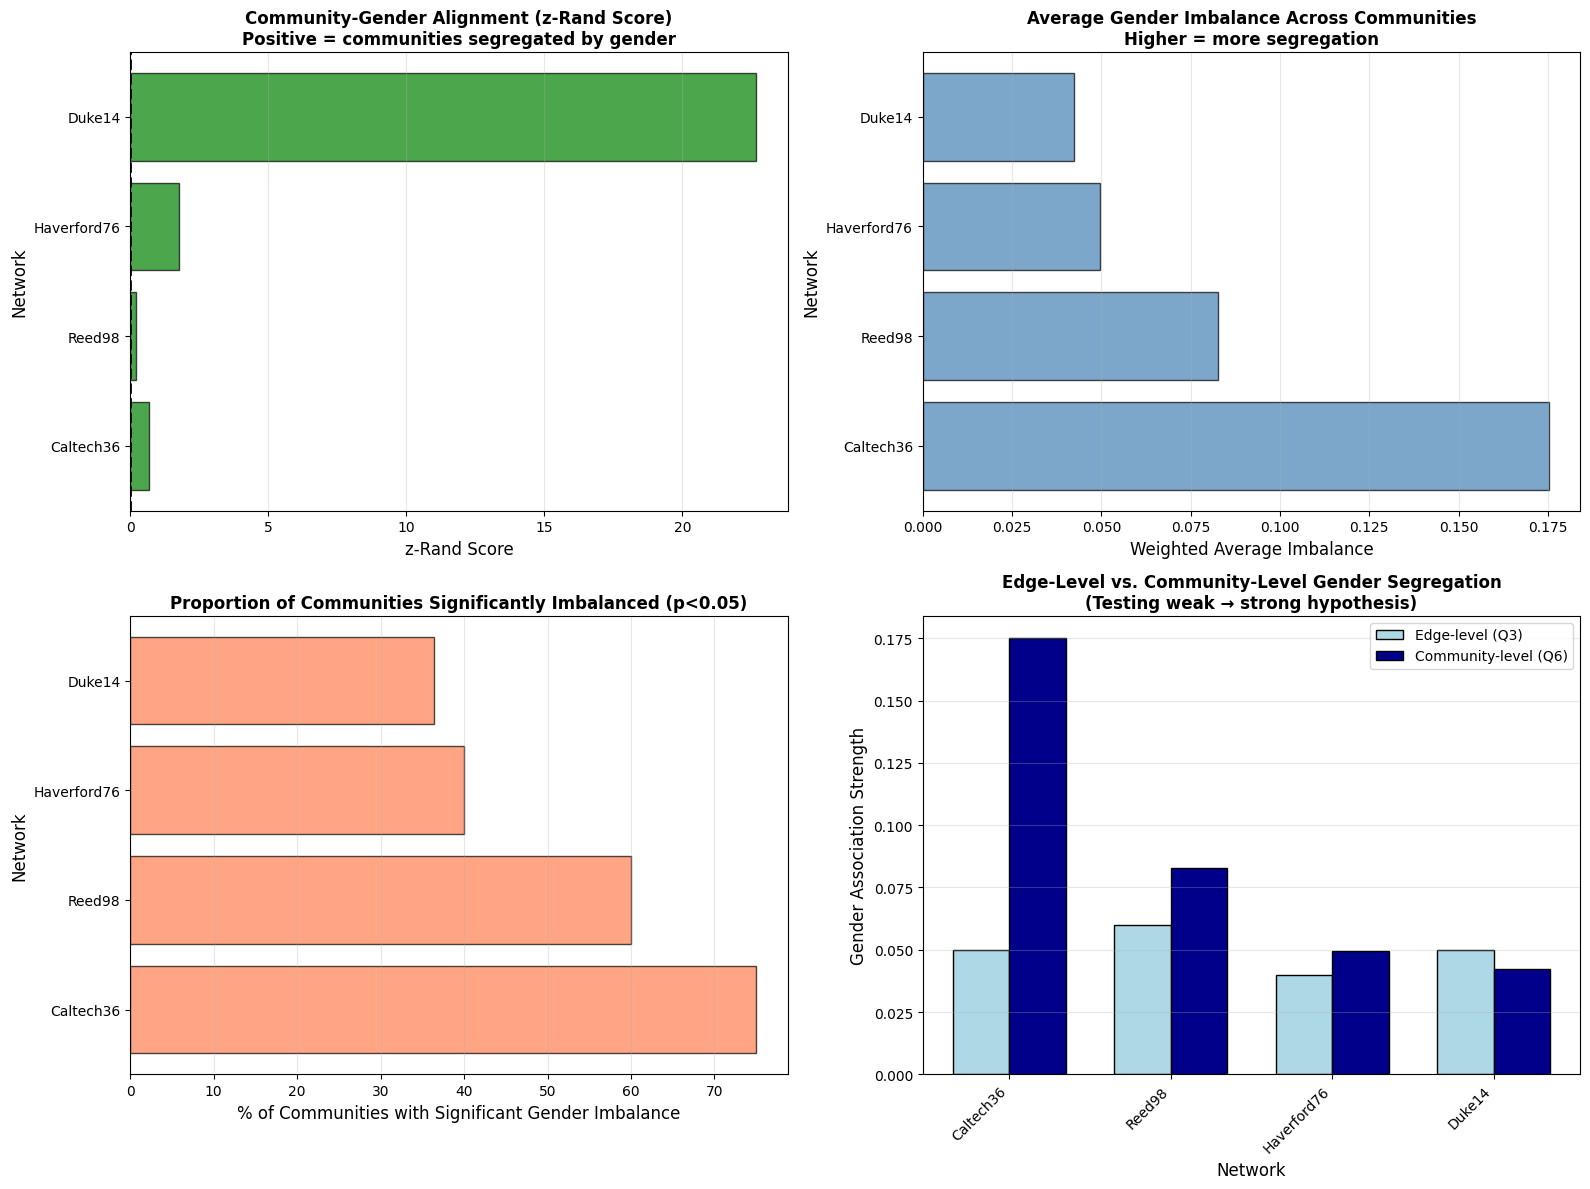


✅ Analysis complete!


In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter, defaultdict
from scipy.stats import chi2_contingency, binom_test
from itertools import combinations
import community as community_louvain  # python-louvain package
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: Community Detection
# ============================================================================

def load_network_with_gender(network_name, data_path='./data'):
    """Load network and extract gender information"""
    gml_file = Path(data_path) / f"{network_name}.gml"
    G = nx.read_gml(gml_file)
    
    # Extract LCC
    lcc_nodes = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(lcc_nodes).copy()
    
    # Extract gender information
    gender_dict = {}
    for node in G_lcc.nodes():
        if 'gender' in G_lcc.nodes[node]:
            gender = G_lcc.nodes[node]['gender']
            if gender in [1, 2]:  # 1=male, 2=female (typical encoding)
                gender_dict[node] = 'Male' if gender == 1 else 'Female'
    
    return G_lcc, gender_dict


def detect_communities_louvain(G, resolution=1.0):
    """
    Detect communities using Louvain algorithm
    
    Parameters
    ----------
    G : NetworkX graph
    resolution : float
        Resolution parameter (higher = more communities)
        
    Returns
    -------
    communities : dict
        {node: community_id}
    """
    # Louvain community detection
    partition = community_louvain.best_partition(G, resolution=resolution)
    
    return partition


# ============================================================================
# PART 2: Gender Analysis of Communities
# ============================================================================

def analyze_community_gender(G, communities, gender_dict):
    """
    Analyze gender composition of each community
    
    Parameters
    ----------
    G : NetworkX graph
    communities : dict
        {node: community_id}
    gender_dict : dict
        {node: gender}
        
    Returns
    -------
    community_stats : DataFrame
        Statistics for each community
    """
    # Get nodes with both community and gender info
    valid_nodes = set(communities.keys()) & set(gender_dict.keys())
    
    # Group by community
    community_groups = defaultdict(list)
    for node in valid_nodes:
        comm_id = communities[node]
        gender = gender_dict[node]
        community_groups[comm_id].append(gender)
    
    # Compute statistics for each community
    stats = []
    for comm_id, genders in community_groups.items():
        gender_counts = Counter(genders)
        total = len(genders)
        
        n_male = gender_counts.get('Male', 0)
        n_female = gender_counts.get('Female', 0)
        
        # Gender ratio
        male_ratio = n_male / total if total > 0 else 0
        female_ratio = n_female / total if total > 0 else 0
        
        # Compute imbalance (deviation from 50-50)
        imbalance = abs(male_ratio - 0.5)
        
        # Statistical test: is this community's gender ratio significantly different from 50-50?
        # Use binomial test
        if total >= 10:  # Only test communities with sufficient size
            p_value = binom_test(n_male, total, p=0.5, alternative='two-sided')
        else:
            p_value = 1.0
        
        stats.append({
            'community': comm_id,
            'size': total,
            'n_male': n_male,
            'n_female': n_female,
            'male_ratio': male_ratio,
            'female_ratio': female_ratio,
            'imbalance': imbalance,
            'p_value': p_value,
            'significant': p_value < 0.05
        })
    
    return pd.DataFrame(stats).sort_values('size', ascending=False)


def compute_overall_gender_segregation(community_stats, gender_dict):
    """
    Compute overall segregation metrics
    
    Returns
    -------
    metrics : dict
    """
    # Overall gender distribution
    all_genders = list(gender_dict.values())
    gender_counts = Counter(all_genders)
    overall_male_ratio = gender_counts['Male'] / len(all_genders)
    
    # Weighted average imbalance
    total_nodes = community_stats['size'].sum()
    weighted_imbalance = (community_stats['imbalance'] * community_stats['size']).sum() / total_nodes
    
    # Proportion of significantly imbalanced communities
    significant_communities = community_stats[community_stats['significant']]
    prop_significant = len(significant_communities) / len(community_stats)
    
    # Proportion of nodes in significantly imbalanced communities
    nodes_in_significant = significant_communities['size'].sum() / total_nodes
    
    metrics = {
        'n_communities': len(community_stats),
        'overall_male_ratio': overall_male_ratio,
        'weighted_avg_imbalance': weighted_imbalance,
        'prop_significant_communities': prop_significant,
        'prop_nodes_in_significant': nodes_in_significant,
        'max_imbalance': community_stats['imbalance'].max(),
        'mean_community_size': community_stats['size'].mean()
    }
    
    return metrics


# ============================================================================
# PART 3: z-Rand Score Computation (from Paper [2])
# ============================================================================

def compute_contingency_table(communities, gender_dict):
    """
    Create contingency table: communities × gender
    
    Returns
    -------
    contingency : 2D array
        Rows = communities, Columns = gender
    community_ids : list
    gender_labels : list
    """
    # Get valid nodes
    valid_nodes = set(communities.keys()) & set(gender_dict.keys())
    
    # Get unique communities and genders
    community_ids = sorted(set(communities[node] for node in valid_nodes))
    gender_labels = ['Male', 'Female']
    
    # Build contingency table
    contingency = np.zeros((len(community_ids), len(gender_labels)))
    
    comm_to_idx = {comm: i for i, comm in enumerate(community_ids)}
    gender_to_idx = {'Male': 0, 'Female': 1}
    
    for node in valid_nodes:
        comm_idx = comm_to_idx[communities[node]]
        gender_idx = gender_to_idx[gender_dict[node]]
        contingency[comm_idx, gender_idx] += 1
    
    return contingency, community_ids, gender_labels


def compute_z_rand_score(contingency):
    """
    Compute z-Rand score following Paper [2] methodology
    
    The z-Rand score measures how much the community-gender alignment
    exceeds random expectation.
    
    Parameters
    ----------
    contingency : 2D array
        n_communities × n_genders
        
    Returns
    -------
    z_rand : float
        Standardized score
    w : int
        Number of same-community, same-gender pairs
    expected_w : float
        Expected w under random null model
    """
    n_ij = contingency
    n = n_ij.sum()
    
    # Compute w (number of pairs that are in same community AND same gender)
    w = 0
    for i in range(n_ij.shape[0]):
        for j in range(n_ij.shape[1]):
            if n_ij[i, j] >= 2:
                w += n_ij[i, j] * (n_ij[i, j] - 1) / 2
    
    # Total number of pairs
    M = n * (n - 1) / 2
    
    # M1: pairs in same community (row marginals)
    row_sums = n_ij.sum(axis=1)
    M1 = sum(r * (r - 1) / 2 for r in row_sums)
    
    # M2: pairs with same gender (column marginals)
    col_sums = n_ij.sum(axis=0)
    M2 = sum(c * (c - 1) / 2 for c in col_sums)
    
    # Expected value under null model
    expected_w = (M1 * M2) / M if M > 0 else 0
    
    # Variance (simplified formula from paper)
    # For exact formula, see Paper [2] equations
    # Here we use approximation for computational efficiency
    variance_w = (M1 * M2 * (M - M1) * (M - M2)) / (M**3) if M > 0 else 1
    
    # z-score
    if variance_w > 0:
        z_rand = (w - expected_w) / np.sqrt(variance_w)
    else:
        z_rand = 0
    
    return z_rand, w, expected_w


# ============================================================================
# PART 4: Visualization
# ============================================================================

def plot_community_gender_distribution(community_stats, network_name):
    """Plot gender distribution across communities"""
    
    # Sort by size and take top 20 communities
    top_communities = community_stats.nlargest(20, 'size')
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Stacked bar chart of gender composition
    ax1 = axes[0]
    x = range(len(top_communities))
    
    ax1.bar(x, top_communities['male_ratio'], label='Male', color='steelblue', alpha=0.8)
    ax1.bar(x, top_communities['female_ratio'], bottom=top_communities['male_ratio'], 
            label='Female', color='coral', alpha=0.8)
    
    # Mark significant communities
    for i, row in enumerate(top_communities.itertuples()):
        if row.significant:
            ax1.text(i, 1.02, '*', ha='center', fontsize=16, fontweight='bold', color='red')
    
    ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=1, alpha=0.5, label='50-50 baseline')
    ax1.set_xlabel('Community (ranked by size)', fontsize=12)
    ax1.set_ylabel('Gender Ratio', fontsize=12)
    ax1.set_title(f'Gender Composition of Top 20 Communities - {network_name}\n(* = significantly different from 50-50)', 
                  fontsize=13, fontweight='bold')
    ax1.legend()
    ax1.set_ylim([0, 1.0])
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Histogram of imbalance scores
    ax2 = axes[1]
    
    # All communities
    ax2.hist(community_stats['imbalance'], bins=30, alpha=0.6, color='gray', 
             edgecolor='black', label='All communities')
    
    # Significant communities
    significant = community_stats[community_stats['significant']]
    if len(significant) > 0:
        ax2.hist(significant['imbalance'], bins=30, alpha=0.8, color='red', 
                edgecolor='darkred', label='Significant (p<0.05)')
    
    ax2.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Perfect balance')
    ax2.set_xlabel('Gender Imbalance (|ratio - 0.5|)', fontsize=12)
    ax2.set_ylabel('Number of Communities', fontsize=12)
    ax2.set_title(f'Distribution of Gender Imbalance Across Communities', 
                  fontsize=13, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'gender_communities_{network_name}.png', dpi=300, bbox_inches='tight')
    plt.show()


def plot_multi_network_comparison(all_results):
    """Compare gender segregation across multiple networks"""
    
    df = pd.DataFrame(all_results)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: z-Rand scores
    ax1 = axes[0, 0]
    colors = ['green' if z > 0 else 'red' for z in df['z_rand']]
    ax1.barh(df['network'], df['z_rand'], color=colors, alpha=0.7, edgecolor='black')
    ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
    ax1.set_xlabel('z-Rand Score', fontsize=12)
    ax1.set_ylabel('Network', fontsize=12)
    ax1.set_title('Community-Gender Alignment (z-Rand Score)\nPositive = communities segregated by gender', 
                  fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Plot 2: Weighted average imbalance
    ax2 = axes[0, 1]
    ax2.barh(df['network'], df['weighted_avg_imbalance'], color='steelblue', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Weighted Average Imbalance', fontsize=12)
    ax2.set_ylabel('Network', fontsize=12)
    ax2.set_title('Average Gender Imbalance Across Communities\nHigher = more segregation', 
                  fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Plot 3: Proportion of significant communities
    ax3 = axes[1, 0]
    ax3.barh(df['network'], df['prop_significant_communities'] * 100, 
             color='coral', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('% of Communities with Significant Gender Imbalance', fontsize=12)
    ax3.set_ylabel('Network', fontsize=12)
    ax3.set_title('Proportion of Communities Significantly Imbalanced (p<0.05)', 
                  fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Plot 4: Edge-level vs community-level comparison
    ax4 = axes[1, 1]
    # Note: You need to add edge_assortativity from Q3 results
    # For now, using placeholder
    x = range(len(df))
    width = 0.35
    
    # You should replace this with actual edge assortativity from Q3
    edge_assort_placeholder = [0.05, 0.06, 0.04, 0.05]  # From your Q3 results
    
    ax4.bar([i - width/2 for i in x], edge_assort_placeholder, width, 
            label='Edge-level (Q3)', color='lightblue', edgecolor='black')
    ax4.bar([i + width/2 for i in x], df['weighted_avg_imbalance'], width, 
            label='Community-level (Q6)', color='darkblue', edgecolor='black')
    
    ax4.set_xlabel('Network', fontsize=12)
    ax4.set_ylabel('Gender Association Strength', fontsize=12)
    ax4.set_title('Edge-Level vs. Community-Level Gender Segregation\n(Testing weak → strong hypothesis)', 
                  fontsize=12, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels(df['network'], rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('gender_segregation_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()


# ============================================================================
# MAIN EXECUTION
# ============================================================================

def run_gender_community_analysis(network_name, data_path='./data'):
    """
    Run complete analysis for one network
    
    Returns
    -------
    results : dict
        All results and statistics
    """
    print(f"\n{'='*70}")
    print(f"Processing {network_name}")
    print(f"{'='*70}")
    
    # Load network
    G, gender_dict = load_network_with_gender(network_name, data_path)
    print(f"  Network: {len(G)} nodes, {G.number_of_edges()} edges")
    print(f"  Nodes with gender: {len(gender_dict)}")
    
    gender_counts = Counter(gender_dict.values())
    print(f"  Gender distribution: {dict(gender_counts)}")
    
    # Detect communities
    print(f"\n  Detecting communities (Louvain)...")
    communities = detect_communities_louvain(G, resolution=1.0)
    n_communities = len(set(communities.values()))
    print(f"  Found {n_communities} communities")
    
    # Analyze gender composition
    print(f"\n  Analyzing gender composition...")
    community_stats = analyze_community_gender(G, communities, gender_dict)
    
    # Overall metrics
    metrics = compute_overall_gender_segregation(community_stats, gender_dict)
    print(f"\n  Overall Metrics:")
    print(f"    Number of communities: {metrics['n_communities']}")
    print(f"    Weighted avg imbalance: {metrics['weighted_avg_imbalance']:.4f}")
    print(f"    Significant communities: {metrics['prop_significant_communities']:.2%}")
    print(f"    Nodes in significant communities: {metrics['prop_nodes_in_significant']:.2%}")
    print(f"    Maximum imbalance: {metrics['max_imbalance']:.4f}")
    
    # Compute z-Rand score
    contingency, comm_ids, gender_labels = compute_contingency_table(communities, gender_dict)
    z_rand, w, expected_w = compute_z_rand_score(contingency)
    print(f"\n  z-Rand Score: {z_rand:.4f}")
    print(f"    (measures community-gender alignment vs. random expectation)")
    print(f"    w (observed pairs): {int(w)}")
    print(f"    E[w] (expected): {expected_w:.1f}")
    
    # Visualize
    plot_community_gender_distribution(community_stats, network_name)
    
    # Compile results
    results = {
        'network': network_name,
        'n_nodes': len(G),
        'n_edges': G.number_of_edges(),
        'n_with_gender': len(gender_dict),
        'n_communities': n_communities,
        'z_rand': z_rand,
        'w_observed': w,
        'w_expected': expected_w,
        **metrics
    }
    
    return results, community_stats


def main():
    """Main execution"""
    
    DATA_PATH = Path('./data')
    
    # Select networks with good gender data
    # Based on Q3 results, these networks have complete gender data
    networks = [
        'Caltech36',
        'Reed98',
        'Haverford76',
        'Duke14'
    ]
    
    all_results = []
    all_community_stats = {}
    
    for network_name in networks:
        try:
            results, community_stats = run_gender_community_analysis(network_name, DATA_PATH)
            all_results.append(results)
            all_community_stats[network_name] = community_stats
        except Exception as e:
            print(f"\n  ERROR processing {network_name}: {e}")
    
    # Create summary DataFrame
    df_results = pd.DataFrame(all_results)
    df_results.to_csv('gender_community_analysis_results.csv', index=False)
    print("\n✅ Results saved to 'gender_community_analysis_results.csv'")
    
    # Summary table
    print(f"\n{'='*70}")
    print("SUMMARY TABLE: Gender Segregation at Community Level")
    print(f"{'='*70}\n")
    
    summary_cols = ['network', 'n_communities', 'z_rand', 'weighted_avg_imbalance', 
                   'prop_significant_communities', 'prop_nodes_in_significant']
    print(df_results[summary_cols].to_string(index=False))
    print(f"{'='*70}")
    
    # Multi-network comparison plot
    if len(all_results) > 1:
        plot_multi_network_comparison(all_results)
    
    print("\n✅ Analysis complete!")


if __name__ == "__main__":
    main()